In [6]:
SUFFIX = '../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01'
POP = '../analyses/2bRAD/PopGen/HCSS_Afilt32m70_01'
INPUT = '../analyses/2bRAD/Inputs/'

In [7]:
#function to run bash commands cleanly
js <- function(shell_command){
    cat(system(shell_command, intern=TRUE), sep='\n')}

# Correlate genetic and epigenetic distances

### For all sites

In [28]:

js("pwd")

/gpfs01/home/kes0132/CommonG_cp2/2019_Mapping/paper-oly-mbdbs-gen/code


In [9]:
js("head ../analyses/methylation-filtered/dist.manhat.csv")

"SeqNum.row","SeqNum.col","dist.manh","SampNum.row","SampNum.col"
1,1,0,"hc1_2","hc1_2"
1,15,273985.441785306,"ss3_15","hc1_2"
1,3,290189.490642819,"hc2_15","hc1_2"
1,17,285476.927245925,"ss3_20","hc1_2"
1,4,281520.711361473,"hc2_17","hc1_2"
1,2,298303.029739484,"hc1_4","hc1_2"
1,7,298537.38668563,"hc3_7","hc1_2"
1,16,284208.486947856,"ss3_16","hc1_2"
1,14,281305.331808996,"ss3_14","hc1_2"


In [10]:
#read in epigenetic Manhattan distance, 10 coverage 
library(spaa)
ep10 <-read.csv("../analyses/methylation-filtered/dist.manhat.csv",header = T)
ep10 <- ep10[,c("SampNum.row","SampNum.col","dist.manh")]
ep10 <- as.matrix(list2dist(ep10))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep10 <- ep10[mbdorder, mbdorder]
ep10
Dep10 <- as.dist(ep10)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.0,298303.0,290189.5,281520.7,323694.5,288274.1,298537.4,276634.8,311367.0,297793.0,280529.9,334528.1,284554.6,281305.3,273985.4,284208.5,285476.9,297048.1
hc1_4,298303.0,0.0,288401.4,272689.0,314054.6,308425.8,290930.3,292157.4,313295.9,306377.3,291403.7,334752.1,291934.5,287946.6,285750.2,292011.5,290794.1,299482.5
hc2_15,290189.5,288401.4,0.0,267996.3,312934.8,306314.1,276217.9,283512.3,309629.3,296792.4,273417.4,339043.0,280972.0,277302.7,270960.4,281246.4,283754.6,297864.8
hc2_17,281520.7,272689.0,267996.3,0.0,314787.3,299622.6,275369.7,267637.3,306306.9,287060.1,263776.1,339119.1,274036.3,268751.4,256317.1,272144.4,273361.0,290238.7
hc3_1,323694.5,314054.6,312934.8,314787.3,0.0,334641.8,299112.8,325937.0,324463.8,321179.5,320997.4,335280.4,315988.8,313767.2,321554.2,317127.8,317475.6,315139.7
hc3_5,288274.1,308425.8,306314.1,299622.6,334641.8,0.0,315610.7,288781.8,325942.9,316722.4,306762.5,346143.9,305665.1,303050.4,296746.5,308046.6,304834.4,313945.2
hc3_7,298537.4,290930.3,276217.9,275369.7,299112.8,315610.7,0.0,292111.6,315363.0,297745.1,282259.6,341069.9,284236.7,279628.7,277165.4,285466.0,287941.8,299663.9
hc3_10,276634.8,292157.4,283512.3,267637.3,325937.0,288781.8,292111.6,0.0,317230.3,297372.5,267563.6,345360.9,279921.4,274370.7,257816.0,277769.7,274299.4,294286.7
hc3_11,311367.0,313295.9,309629.3,306306.9,324463.8,325942.9,315363.0,317230.3,0.0,306749.7,303226.0,330648.3,295962.1,294657.6,302097.9,297720.5,300676.0,304098.3
ss2_9,297793.0,306377.3,296792.4,287060.1,321179.5,316722.4,297745.1,297372.5,306749.7,0.0,253556.8,313685.4,255231.0,253726.0,268911.5,256477.3,273957.8,278320.1


In [19]:
Dep10

           hc1_2     hc1_4    hc2_15    hc2_17     hc3_1     hc3_5     hc3_7
hc1_4  10545.532                                                            
hc2_15 10351.204  9064.440                                                  
hc2_17  9385.573  7984.184  8032.958                                        
hc3_1  10610.214  8727.395  9008.169  9827.633                              
hc3_5   6363.300  8905.577  9760.334  8017.600  8808.350                    
hc3_7  10611.443  8699.207  7750.867  8785.571  6567.108  9189.478          
hc3_10  8551.481 10736.499 10319.292  9408.603 10436.642  7834.229 10443.443
hc3_11  9068.337 10026.701 11194.320 10454.902 10554.475  9119.644 10804.160
ss2_9  14788.300 17346.810 16995.519 16400.962 16222.809 15202.564 17348.604
ss2_14 14887.002 16626.609 16120.010 16108.636 16014.164 15975.183 16705.442
ss2_18 13635.256 15169.867 15450.882 15381.091 13934.951 13292.572 14868.123
ss3_3  14606.952 16480.535 16418.206 15743.180 15248.147 15959.683 16044.562

In [11]:
# read in genetic distances
gen <- read.table(paste0(POP,"_mbd.dist"), row.names = 1, header=T)
gen
Dgen <- as.dist(gen)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hc1_2,0.0000000,0.2155436,0.2054988,0.2245761,0.2140475,0.1251035,0.2137833,0.1941731,0.2196581,0.2191748,0.2201363,0.2251679,0.2293540,0.2303018,0.2273960,0.2267536,0.2241723,0.2393679
hc1_4,0.2155436,0.0000000,0.1844240,0.1693271,0.1811331,0.2071129,0.1608409,0.2090009,0.2157563,0.2186305,0.2188330,0.2146309,0.2291905,0.2247412,0.2257357,0.2190871,0.2157204,0.2274161
hc2_15,0.2054988,0.1844240,0.0000000,0.2041950,0.1854690,0.2021604,0.1823913,0.1592689,0.2168135,0.2041132,0.2085476,0.1910094,0.2042863,0.2045106,0.2061360,0.2040459,0.2013346,0.2098602
hc2_17,0.2245761,0.1693271,0.2041950,0.0000000,0.1884048,0.2163634,0.1724402,0.2179260,0.2265039,0.2268210,0.2268209,0.2283067,0.2379735,0.2322090,0.2385235,0.2269364,0.2294361,0.2372695
hc3_1,0.2140475,0.1811331,0.1854690,0.1884048,0.0000000,0.2084380,0.1141350,0.2070880,0.2092909,0.2195993,0.2160866,0.2155464,0.2254828,0.2196778,0.2258590,0.2205749,0.2200920,0.2156870
hc3_5,0.1251035,0.2071129,0.2021604,0.2163634,0.2084380,0.0000000,0.2104185,0.1869989,0.2143060,0.2202222,0.2148287,0.2214425,0.2216537,0.2194587,0.2223524,0.2192765,0.2221298,0.2263948
hc3_7,0.2137833,0.1608409,0.1823913,0.1724402,0.1141350,0.2104185,0.0000000,0.2098760,0.2154145,0.2211945,0.2233552,0.2236631,0.2265407,0.2248371,0.2269251,0.2224353,0.2260581,0.2286600
hc3_10,0.1941731,0.2090009,0.1592689,0.2179260,0.2070880,0.1869989,0.2098760,0.0000000,0.2158190,0.2072541,0.2123815,0.2048036,0.2057382,0.2078799,0.1916720,0.2139469,0.2081097,0.2118349
hc3_11,0.2196581,0.2157563,0.2168135,0.2265039,0.2092909,0.2143060,0.2154145,0.2158190,0.0000000,0.2204729,0.2206785,0.2201360,0.2362094,0.2252514,0.2307265,0.2282604,0.2200907,0.2270442


In [18]:
distObj <- list(Dep10,Dgen)
names(distObj) <- c("Dep10","Dgen")
save(distObj,file="../analyses/2bRAD/MethGen/dist_allmeth_snp.Robj")


Call:
lm(formula = Dep10 ~ Dgen)

Residuals:
   Min     1Q Median     3Q    Max 
-53094 -17259   -937  18870  54443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   229505      15591  14.720  < 2e-16 ***
Dgen          299862      75420   3.976 0.000108 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24320 on 151 degrees of freedom
Multiple R-squared:  0.09477,	Adjusted R-squared:  0.08877 
F-statistic: 15.81 on 1 and 151 DF,  p-value: 0.0001084


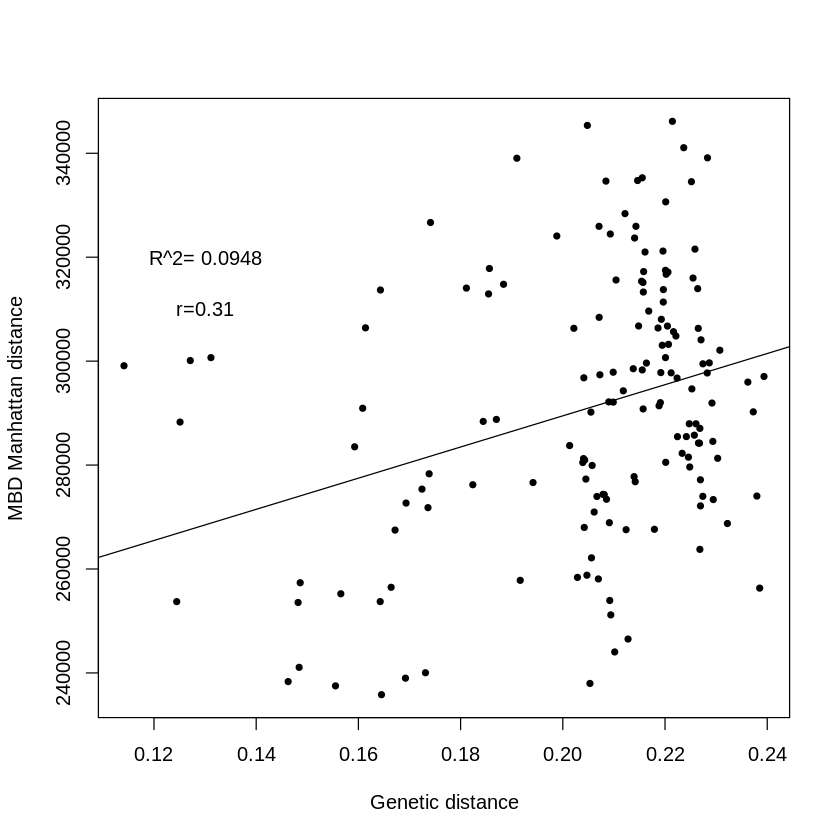

In [6]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep10, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance")
summary(lm(Dep10~Dgen),)
R2 = round(summary(lm(Dep10~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep10~Dgen))
text(0.13,320000,label=paste("R^2=",R2))
text(0.13,310000,label="r=0.31")

In [13]:
cor.test( ~ Dep10 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep10 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep10 and Dgen
t = 3.9759, df = 151, p-value = 0.0001084
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1568240 0.4447926
sample estimates:
      cor 
0.3078416 



	Spearman's rank correlation rho

data:  Dep10 and Dgen
S = 444614, p-value = 0.001505
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2551332 


### For DMLs

In [14]:
#read in epigenetic Manhattan distance, 10 coverage, DML 
ep10 <-read.csv("../analyses/methylation-filtered/dist.manhat.DMLs.csv",header = T)
ep10 <- ep10[,c("SampNum.row","SampNum.col","dist.manh")]
ep10 <- as.matrix(list2dist(ep10))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep10 <- ep10[mbdorder, mbdorder]
ep10
Dep10 <- as.dist(ep10)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.000,10545.532,10351.204,9385.573,10610.214,6363.300,10611.443,8551.481,9068.337,14788.300,14887.002,13635.256,14606.952,14484.494,11693.997,14072.044,11702.18,13190.286
hc1_4,10545.532,0.000,9064.440,7984.184,8727.395,8905.577,8699.207,10736.499,10026.701,17346.810,16626.609,15169.867,16480.535,16347.990,14253.680,15345.568,13291.64,15195.551
hc2_15,10351.204,9064.440,0.000,8032.958,9008.169,9760.334,7750.867,10319.292,11194.320,16995.519,16120.010,15450.882,16418.206,16417.512,13740.327,15822.143,13357.00,15649.929
hc2_17,9385.573,7984.184,8032.958,0.000,9827.633,8017.600,8785.571,9408.603,10454.902,16400.962,16108.636,15381.091,15743.180,15586.173,13138.397,14668.390,12158.79,14422.239
hc3_1,10610.214,8727.395,9008.169,9827.633,0.000,8808.350,6567.108,10436.642,10554.475,16222.809,16014.164,13934.951,15248.147,14915.306,12793.947,14521.674,12503.21,13721.460
hc3_5,6363.300,8905.577,9760.334,8017.600,8808.350,0.000,9189.478,7834.229,9119.644,15202.564,15975.183,13292.572,15959.683,15121.119,11756.756,15334.174,12440.56,14534.806
hc3_7,10611.443,8699.207,7750.867,8785.571,6567.108,9189.478,0.000,10443.443,10804.160,17348.604,16705.442,14868.123,16044.562,16375.903,13350.965,16117.654,13837.97,15293.315
hc3_10,8551.481,10736.499,10319.292,9408.603,10436.642,7834.229,10443.443,0.000,10148.679,15486.501,14988.730,13497.210,15209.257,14489.565,12354.985,14441.498,11705.99,14281.504
hc3_11,9068.337,10026.701,11194.320,10454.902,10554.475,9119.644,10804.160,10148.679,0.000,15102.614,14709.279,13012.517,14188.195,14113.226,11779.373,13574.423,12187.15,13623.710
ss2_9,14788.300,17346.810,16995.519,16400.962,16222.809,15202.564,17348.604,15486.501,15102.614,0.000,9317.558,8747.628,8413.878,9119.600,10149.293,8682.160,11387.52,8899.327


In [15]:
distObj <- list(Dep10,Dgen)
save(distObj,file="../analyses/2bRAD/MethGen/dist_DML_snp.Robj")


Call:
lm(formula = Dep10 ~ Dgen)

Residuals:
   Min     1Q Median     3Q    Max 
 -5032  -1730    -81   1508   4874 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3343       1374  -2.433   0.0161 *  
Dgen           75762       6646  11.400   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2143 on 151 degrees of freedom
Multiple R-squared:  0.4625,	Adjusted R-squared:  0.459 
F-statistic:   130 on 1 and 151 DF,  p-value: < 2.2e-16


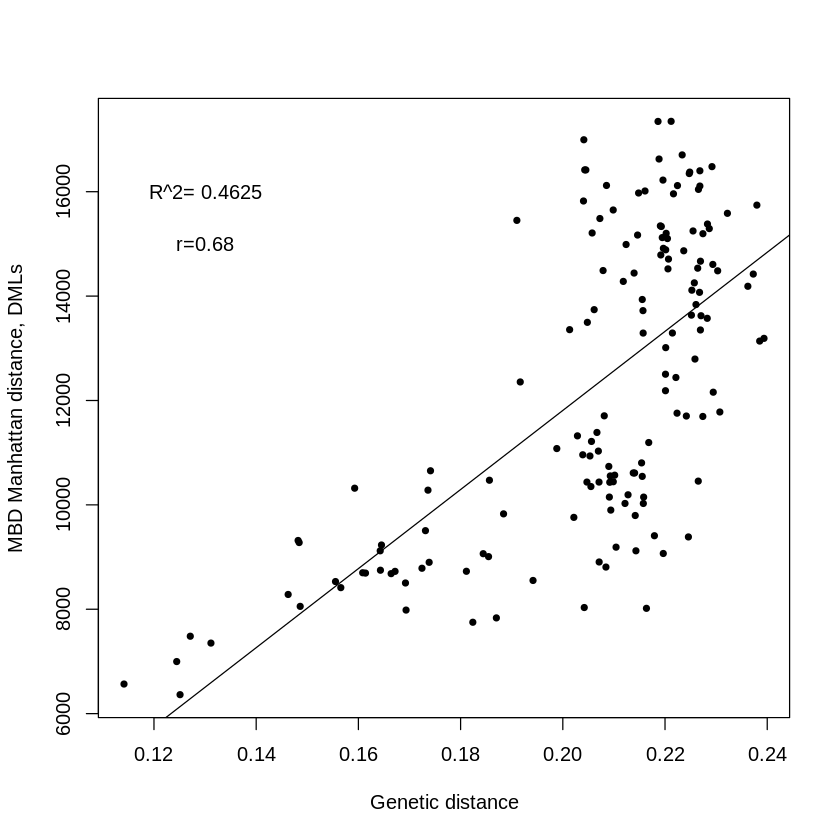

In [9]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep10, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance, DMLs")
summary(lm(Dep10~Dgen),)
R2 = round(summary(lm(Dep10~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep10~Dgen))
text(0.13,16000,label=paste("R^2=",R2))
text(0.13,15000,label="r=0.68")

In [11]:
cor.test( ~ Dep10 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep10 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep10 and Dgen
t = 11.529, df = 151, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5895371 0.7603386
sample estimates:
      cor 
0.6842097 



	Spearman's rank correlation rho

data:  Dep10 and Dgen
S = 209532, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6489687 


# Correlate Pst and Fst  
## For overlapping genes

### All genes with methylation data

In [1]:
head ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab
wc -l ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab

"Quant_Varia"	"contig_gene"	"start_gene_2kb"	"end_gene_2kb"	"Pst_Values"
"Contig0_10497_95068"	"Contig0"	"10497"	"95068"	0.019332886629221
"Contig100_48322_58076"	"Contig100"	"48322"	"58076"	0.067008101478262
"Contig100188_1_4123"	"Contig100188"	"1"	"4123"	0.734962005060689
"Contig100199_5411_27437"	"Contig100199"	"5411"	"27437"	0.0682501114385254
"Contig100396_1_4908"	"Contig100396"	"1"	"4908"	0.185205868587485
"Contig100499_508_4044"	"Contig100499"	"508"	"4044"	0.150423262664518
"Contig1006_1_13779"	"Contig1006"	"1"	"13779"	0.0880097439836617
"Contig100691_1_8538"	"Contig100691"	"1"	"8538"	0.0188795032121047
"Contig10074_2260_6621"	"Contig10074"	"2260"	"6621"	0.251312849756899
3755 ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab


In [2]:
# read in Pst data
pst <- read.csv("../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst) <- c("id","contig","start","end","pst")
head(pst)

id,contig,start,end,pst
Contig0_10497_95068,Contig0,10497,95068,0.01933289
Contig100_48322_58076,Contig100,48322,58076,0.06700810
Contig100188_1_4123,Contig100188,1,4123,0.73496201
Contig100199_5411_27437,Contig100199,5411,27437,0.06825011
Contig100396_1_4908,Contig100396,1,4908,0.18520587
Contig100499_508_4044,Contig100499,508,4044,0.15042326


In [3]:
wc -l SFS/HCSS_sfsm70_PerGeneFst.csv

1387 SFS/HCSS_sfsm70_PerGeneFst.csv


In [1]:
list.of.packages <- c("reshape2","dplyr", "tidyr", "readr", "stringr", "plotly","tidyverse","lfmm") #add new libraries here 
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

# Load all libraries 
lapply(list.of.packages, FUN = function(X) {
  do.call("require", list(X)) 
})

Failed to switch to language R: No subkernel named R is found. Please make sure that you have the kernel installed (listed in the output of "jupyter kernelspec list" and usable in jupyter by itself), install appropriate language module (e.g. "pip install sos-r"), restart jupyter notebook and try again.


In [15]:
genes <- 
  read_delim(file = "SFS/HCSS_sfsm70_PerGeneFst.csv", delim = "\t", col_names = TRUE)
head(genes)

Parsed with column specification:
cols(
  id = col_character(),
  contig = col_character(),
  start = col_double(),
  end = col_double(),
  notes_gene = col_character(),
  fst01 = col_double()
)


id,contig,start,end,notes_gene,fst01
Contig103346_4131_18776,Contig103346,4131,18776,"ID=OLUR_00011851;Name=OLUR_00011851;Alias=maker-Contig103346-snap-gene-0.4;Note=Similar to HSPA12B: Heat shock 70 kDa protein 12B (Homo sapiens OX%3D9606);Dbxref=CDD:cd10229,Gene3D:G3DSA:3.30.420.40,Gene3D:G3DSA:3.90.640.10,InterPro:IPR013126,PRINTS:PR00301,Pfam:PF00012,SUPERFAMILY:SSF53067;",0.069637883
Contig60108_1_13731,Contig60108,1,13731,"ID=OLUR_00014779;Name=OLUR_00014779;Alias=maker-Contig60108-snap-gene-0.2;Note=Similar to MLH3: DNA mismatch repair protein Mlh3 (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:3.30.230.10,Gene3D:G3DSA:3.30.565.10,InterPro:IPR013507,InterPro:IPR014721,InterPro:IPR020568,InterPro:IPR036890,MobiDBLite:mobidb-lite,Pfam:PF01119,SMART:SM01340,SUPERFAMILY:SSF54211,SUPERFAMILY:SSF55874;Ontology_term=GO:0005524,GO:0006298,GO:0030983;",0.121951220
Contig27784_1_12761,Contig27784,1,12761,"ID=OLUR_00013246;Name=OLUR_00013246;Alias=maker-Contig27784-snap-gene-0.2;Note=Similar to Fbxl6: F-box/LRR-repeat protein 6 (Mus musculus OX%3D10090);Dbxref=Gene3D:G3DSA:3.80.10.10,InterPro:IPR032675,SUPERFAMILY:SSF52047;",0.041095890
Contig38648_3515_20578,Contig38648,3515,20578,"ID=OLUR_00010999;Name=OLUR_00010999;Alias=maker-Contig38648-snap-gene-0.2;Note=Similar to Rnf8: E3 ubiquitin-protein ligase RNF8 (Mus musculus OX%3D10090);Dbxref=CDD:cd16535,Coils:Coil,Gene3D:G3DSA:3.30.40.10,InterPro:IPR001841,InterPro:IPR013083,InterPro:IPR017907,MobiDBLite:mobidb-lite,Pfam:PF13923,ProSitePatterns:PS00518,ProSiteProfiles:PS50089,SMART:SM00184,SUPERFAMILY:SSF57850;",0.047858942
Contig282_38634_44741,Contig282,38634,44741,"ID=OLUR_00002451;Name=OLUR_00002451;Alias=snap_masked-Contig282-processed-gene-0.4;Note=Similar to Cry2: Cryptochrome-2 (Rattus norvegicus OX%3D10116);Dbxref=Gene3D:G3DSA:3.40.50.620,InterPro:IPR006050,InterPro:IPR014729,InterPro:IPR036155,Pfam:PF00875,ProSiteProfiles:PS51645,SUPERFAMILY:SSF52425;",0.001798561
Contig282_26273_42182,Contig282,26273,42182,"ID=OLUR_00002450;Name=OLUR_00002450;Alias=maker-Contig282-snap-gene-0.10;Note=Similar to API5: Apoptosis inhibitor 5 (Pongo abelii OX%3D9601);Dbxref=Coils:Coil,InterPro:IPR008383,InterPro:IPR016024,MobiDBLite:mobidb-lite,Pfam:PF05918,SUPERFAMILY:SSF48371;",0.001644737


In [16]:
length(intersect(pst$id,genes$id))

[1] 237

In [18]:
both = merge(pst,genes, by ="id")
head(both)

id,contig.x,start.x,end.x,pst,contig.y,start.y,end.y,notes_gene,fst01
Contig0_10497_95068,Contig0,10497,95068,0.01933289,Contig0,10497,95068,"ID=OLUR_00000039;Name=OLUR_00000039;Alias=maker-Contig0-snap-gene-0.8;Note=Similar to WDR87: WD repeat-containing protein 87 (Homo sapiens OX%3D9606);Dbxref=Coils:Coil,Gene3D:G3DSA:1.25.10.10,Gene3D:G3DSA:2.130.10.10,InterPro:IPR001680,InterPro:IPR011989,InterPro:IPR015943,InterPro:IPR016024,InterPro:IPR017986,InterPro:IPR036322,MobiDBLite:mobidb-lite,Pfam:PF00400,ProSiteProfiles:PS50082,ProSiteProfiles:PS50294,SMART:SM00320,SUPERFAMILY:SSF48371,SUPERFAMILY:SSF50978;Ontology_term=GO:0005515;",0.000000000
Contig10074_2260_6621,Contig10074,2260,6621,0.25131285,Contig10074,2260,6621,ID=OLUR_00025622;Name=OLUR_00025622;Alias=maker-Contig10074-snap-gene-0.2;Note=Similar to V-RMIL: Serine/threonine-protein kinase-transforming protein Rmil (Avian rous-associated virus type 1 OX%3D11950);Dbxref=Gene3D:G3DSA:1.10.510.10;,0.192019950
Contig107541_1926_7324,Contig107541,1926,7324,0.66627497,Contig107541,1926,7324,"ID=OLUR_00024691;Name=OLUR_00024691;Alias=maker-Contig107541-snap-gene-0.2;Note=Protein of unknown function;Dbxref=Gene3D:G3DSA:3.30.710.10,InterPro:IPR000210,InterPro:IPR011333,MobiDBLite:mobidb-lite,Pfam:PF00651,ProSiteProfiles:PS50097,SUPERFAMILY:SSF54695;Ontology_term=GO:0005515;",0.045112782
Contig109827_1765_6591,Contig109827,1765,6591,0.66755413,Contig109827,1765,6591,ID=OLUR_00025663;Name=OLUR_00025663;Alias=maker-Contig109827-snap-gene-0.2;Note=Similar to Unc80: Protein unc-80 homolog (Mus musculus OX%3D10090);,0.150627615
Contig112833_1_6669,Contig112833,1,6669,0.68067953,Contig112833,1,6669,"ID=OLUR_00025551;Name=OLUR_00025551;Alias=maker-Contig112833-snap-gene-0.2;Note=Similar to Gls2: Glutaminase liver isoform%2C mitochondrial (Mus musculus OX%3D10090);Dbxref=CDD:cd00204,Gene3D:G3DSA:1.25.40.20,Gene3D:G3DSA:3.40.710.10,InterPro:IPR002110,InterPro:IPR012338,InterPro:IPR015868,InterPro:IPR020683,InterPro:IPR036770,Pfam:PF04960,Pfam:PF12796,ProSiteProfiles:PS50088,ProSiteProfiles:PS50297,SMART:SM00248,SUPERFAMILY:SSF48403,SUPERFAMILY:SSF56601;Ontology_term=GO:0004359,GO:0005515,GO:0006541;",0.005154639
Contig129_9110_46084,Contig129,9110,46084,0.06717008,Contig129,9110,46084,"ID=OLUR_00001506;Name=OLUR_00001506;Alias=maker-Contig129-snap-gene-0.10;Note=Similar to Ints3: Integrator complex subunit 3 (Mus musculus OX%3D10090);Dbxref=InterPro:IPR019333,MobiDBLite:mobidb-lite,Pfam:PF10189;",0.100917431


#### 3755 genes with Pst value, 1387 genes with Fst value, 237 overlapping genes 



Call:
lm(formula = both$pst ~ both$fst01)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27839 -0.19593 -0.06751  0.14782  0.66175 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26639    0.01780  14.965   <2e-16 ***
both$fst01   0.04315    0.14978   0.288    0.774    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2282 on 235 degrees of freedom
Multiple R-squared:  0.0003531,	Adjusted R-squared:  -0.003901 
F-statistic: 0.08301 on 1 and 235 DF,  p-value: 0.7735


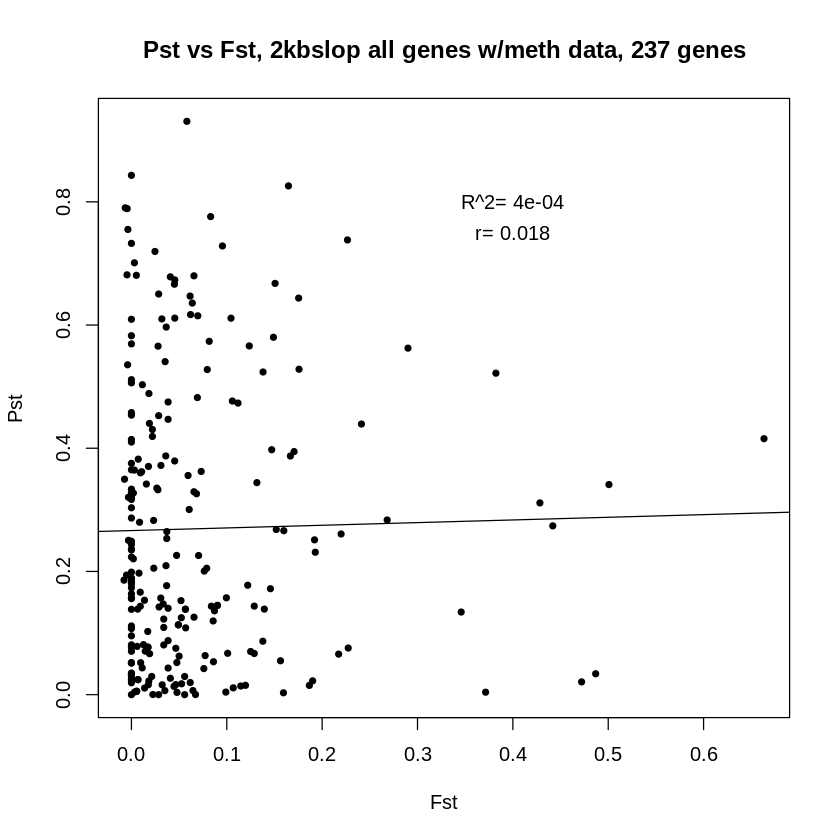

In [23]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(both$fst01, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 2kbslop all genes w/meth data, 237 genes")
summary(lm(both$pst~both$fst01),)
R2 = round(summary(lm(both$pst~both$fst01))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst01))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= 0.018")

In [21]:
cor.test( ~ both$pst + both$fst01,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst01, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst01
t = 0.28812, df = 235, p-value = 0.7735
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1088997  0.1458724
sample estimates:
       cor 
0.01879138 


Warning message in cor.test.default(x = c(0.019332886629221, 0.251312849756899, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  both$pst and both$fst01
S = 2264910, p-value = 0.7494
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02085675 


#### Get gene annotations for these overlaps

Hih Pst, low Fst

In [33]:
both[which(both$fst01 <0.01 & both$pst >0.5),c(1,5,10,9)]

,id,pst,fst01,notes_gene
5,Contig112833_1_6669,0.6806795,0.005154639,"ID=OLUR_00025551;Name=OLUR_00025551;Alias=maker-Contig112833-snap-gene-0.2;Note=Similar to Gls2: Glutaminase liver isoform%2C mitochondrial (Mus musculus OX%3D10090);Dbxref=CDD:cd00204,Gene3D:G3DSA:1.25.40.20,Gene3D:G3DSA:3.40.710.10,InterPro:IPR002110,InterPro:IPR012338,InterPro:IPR015868,InterPro:IPR020683,InterPro:IPR036770,Pfam:PF04960,Pfam:PF12796,ProSiteProfiles:PS50088,ProSiteProfiles:PS50297,SMART:SM00248,SUPERFAMILY:SSF48403,SUPERFAMILY:SSF56601;Ontology_term=GO:0004359,GO:0005515,GO:0006541;"
35,Contig18485_27692_52779,0.7325620,0.000000000,"ID=OLUR_00001082;Name=OLUR_00001082;Alias=maker-Contig18485-snap-gene-0.8;Note=Similar to RREB1: Ras-responsive element-binding protein 1 (Gallus gallus OX%3D9031);Dbxref=Gene3D:G3DSA:3.30.160.60,InterPro:IPR013087,InterPro:IPR036236,MobiDBLite:mobidb-lite,Pfam:PF00096,Pfam:PF13894,Pfam:PF13909,Pfam:PF13912,ProSitePatterns:PS00028,ProSiteProfiles:PS50157,SMART:SM00355,SUPERFAMILY:SSF57667;Ontology_term=GO:0003676;"
52,Contig206988_1_7220,0.5694211,0.000000000,"ID=OLUR_00024466;Name=OLUR_00024466;Alias=snap_masked-Contig206988-processed-gene-0.0;Note=Similar to Wdr54: WD repeat-containing protein 54 (Mus musculus OX%3D10090);Dbxref=InterPro:IPR036322,SUPERFAMILY:SSF50978;Ontology_term=GO:0005515;"
66,Contig2254_1_11569,0.5354929,-0.004008016,"ID=OLUR_00019191;Name=OLUR_00019191;Alias=maker-Contig2254-snap-gene-0.1;Note=Similar to VVA0006: Riboflavin biosynthesis protein VVA0006 (Vibrio vulnificus (strain YJ016) OX%3D196600);Dbxref=CDD:cd15457,Coils:Coil,Gene3D:G3DSA:1.10.357.40,InterPro:IPR012816,InterPro:IPR037238,MobiDBLite:mobidb-lite,Pfam:PF08719,SUPERFAMILY:SSF143990,TIGRFAM:TIGR02464;"
86,Contig24745_17400_35588,0.6093125,0.000000000,ID=OLUR_00002446;Name=OLUR_00002446;Alias=maker-Contig24745-snap-gene-0.7;Note=Protein of unknown function;Dbxref=Coils:Coil;
95,Contig26170_5945_21684,0.6814634,-0.004629630,"ID=OLUR_00010285;Name=OLUR_00010285;Alias=maker-Contig26170-snap-gene-0.3;Note=Similar to Stk31: Serine/threonine-protein kinase 31 (Mus musculus OX%3D10090);Dbxref=CDD:cd00180,Coils:Coil,Gene3D:G3DSA:1.10.510.10,InterPro:IPR011009,MobiDBLite:mobidb-lite,SUPERFAMILY:SSF56112;"
130,Contig32566_4290_23883,0.8429597,0.000000000,ID=OLUR_00002794;Name=OLUR_00002794;Alias=snap_masked-Contig32566-processed-gene-0.0;Note=Protein of unknown function;Dbxref=MobiDBLite:mobidb-lite;
131,Contig32566_9055_42575,0.7889923,-0.004415011,"ID=OLUR_00002795;Name=OLUR_00002795;Alias=maker-Contig32566-snap-gene-0.7;Note=Similar to HECTD1: E3 ubiquitin-protein ligase HECTD1 (Homo sapiens OX%3D9606);Dbxref=CDD:cd00204,Coils:Coil,Gene3D:G3DSA:1.25.40.20,Gene3D:G3DSA:2.30.30.920,Gene3D:G3DSA:2.60.120.260,InterPro:IPR002110,InterPro:IPR008979,InterPro:IPR010606,InterPro:IPR012919,InterPro:IPR020683,InterPro:IPR036770,InterPro:IPR037252,MobiDBLite:mobidb-lite,Pfam:PF06701,Pfam:PF07738,Pfam:PF13857,ProSiteProfiles:PS50088,ProSiteProfiles:PS50297,ProSiteProfiles:PS51416,SMART:SM00248,SUPERFAMILY:SSF159034,SUPERFAMILY:SSF48403,SUPERFAMILY:SSF49785;Ontology_term=GO:0004842,GO:0005515,GO:0016567,GO:0046872;"
134,Contig32910_2664_19377,0.7010187,0.003144654,"ID=OLUR_00011811;Name=OLUR_00011811;Alias=maker-Contig32910-snap-gene-0.4;Note=Similar to Spata6: Spermatogenesis-associated protein 6 (Mus musculus OX%3D10090);Dbxref=Coils:Coil,InterPro:IPR032732,Pfam:PF14909;"
155,Contig37588_11392_33472,0.7551651,-0.003696858,"ID=OLUR_00003309;Name=OLUR_00003309;Alias=maker-Contig37588-snap-gene-0.5;Note=Protein of unknown function;Dbxref=Coils:Coil,MobiDBLite:mobidb-lite;"


Low Pst, high Fst

In [28]:
both[which(both$fst01 >0.3 & both$pst <0.1),c(1,5,10,9)]

,id,pst,fst01,notes_gene
49,Contig20413_1_17467,0.020724598,0.4720812,"ID=OLUR_00010706;Name=OLUR_00010706;Alias=maker-Contig20413-snap-gene-0.3;Note=Similar to sll1388: Universal stress protein Sll1388 (Synechocystis sp. (strain PCC 6803 / Kazusa) OX%3D1111708);Dbxref=CDD:cd00293,Coils:Coil,Gene3D:G3DSA:3.40.50.620,InterPro:IPR006015,InterPro:IPR006016,InterPro:IPR014729,PRINTS:PR01438,Pfam:PF00582,SUPERFAMILY:SSF52402;"
143,Contig34298_13092_51114,0.004027313,0.3714286,"ID=OLUR_00001738;Name=OLUR_00001738;Alias=maker-Contig34298-snap-gene-0.4;Note=Similar to BIRC6: Baculoviral IAP repeat-containing protein 6 (Homo sapiens OX%3D9606);Dbxref=CDD:cd00022,Gene3D:G3DSA:1.10.1170.10,InterPro:IPR001370,InterPro:IPR019775,InterPro:IPR036322,MobiDBLite:mobidb-lite,Pfam:PF00653,ProSitePatterns:PS00678,ProSiteProfiles:PS50143,SMART:SM00238,SUPERFAMILY:SSF50978,SUPERFAMILY:SSF57924;Ontology_term=GO:0005515;"
197,Contig50657_1_11990,0.033930990,0.4868217,"ID=OLUR_00017738;Name=OLUR_00017738;Alias=maker-Contig50657-snap-gene-0.3;Note=Similar to KDM3B: Lysine-specific demethylase 3B (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:2.60.120.650,InterPro:IPR003347,MobiDBLite:mobidb-lite,Pfam:PF02373,ProSiteProfiles:PS51184,SMART:SM00558,SUPERFAMILY:SSF51197;"


High Fst, high Pst

In [29]:
both[which(both$fst01 >0.3 & both$pst >0.3),c(1,5,10,9)]

,id,pst,fst01,notes_gene
19,Contig16916_3259_40767,0.5218304,0.3822314,"ID=OLUR_00001636;Name=OLUR_00001636;Alias=maker-Contig16916-snap-gene-0.8;Note=Similar to Med13: Mediator of RNA polymerase II transcription subunit 13 (Mus musculus OX%3D10090);Dbxref=InterPro:IPR009401,InterPro:IPR021643,MobiDBLite:mobidb-lite,Pfam:PF06333,Pfam:PF11597;Ontology_term=GO:0003712,GO:0006357,GO:0016592;"
85,Contig24693_2452_15381,0.3410517,0.5007496,"ID=OLUR_00007682;Name=OLUR_00007682;Alias=maker-Contig24693-snap-gene-0.4;Note=Protein of unknown function;Dbxref=Gene3D:G3DSA:1.10.533.10,InterPro:IPR000488,InterPro:IPR011029,MobiDBLite:mobidb-lite,ProSiteProfiles:PS50017,SUPERFAMILY:SSF47986;Ontology_term=GO:0005515,GO:0007165;"
108,Contig28902_528_13774,0.3112797,0.4283427,"ID=OLUR_00000830;Name=OLUR_00000830;Alias=maker-Contig28902-snap-gene-0.12;Note=Similar to SPON1: Spondin-1 (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:2.20.100.10,Gene3D:G3DSA:2.60.40.2130,InterPro:IPR000884,InterPro:IPR009465,InterPro:IPR036383,InterPro:IPR038678,MobiDBLite:mobidb-lite,Pfam:PF00090,Pfam:PF06468,ProSiteProfiles:PS50092,ProSiteProfiles:PS51020,SMART:SM00209,SUPERFAMILY:SSF82895;"
227,Contig77382_1559_12918,0.4155037,0.6633523,"ID=OLUR_00016056;Name=OLUR_00016056;Alias=snap_masked-Contig77382-processed-gene-0.0;Note=Similar to Socs5: Suppressor of cytokine signaling 5 (Mus musculus OX%3D10090);Dbxref=Gene3D:G3DSA:3.30.505.10,InterPro:IPR000980,InterPro:IPR036860,MobiDBLite:mobidb-lite,Pfam:PF00017,SUPERFAMILY:SSF55550;"


## Get 1st and last 15% of genes as bed file

In [37]:
sfsSuf = "SFS/HCSS_sfsm70"

In [2]:
module load gcc/6.2.0
module load xz/5.2.2 
module load bzip2/1.0.6
module load bedtools/2.29.0

In [4]:
# extracting gene regions out of genome annotations file (gff3)
cat ../../paper-oly-mbdbs-gen/genome-features/Olurida_v081-20190709.gene.gff | cut -f 1,4,5,9 > gene_regions.tab

In [22]:
%expand
# reading gene regions
genes=read.table("gene_regions.tab",sep="\t")
names(genes)=c("contig","start","end","notes")

In [23]:
genes$pct15 <- as.integer((genes$end - genes$start)*0.15)
genes$start15 <- genes$start +genes$pct15
genes$end15 <- genes$end - genes$pct15
head(genes)

contig,start,end,notes,pct15,start15,end15
Contig61093,7493,7946,ID=OLUR_00020575;Name=OLUR_00020575;Alias=maker-Contig61093-snap-gene-0.2;Note=Protein of unknown function;,67,7560,7879
Contig1111,24968,28696,"ID=OLUR_00006628;Name=OLUR_00006628;Alias=maker-Contig1111-snap-gene-0.1;Note=Similar to Spag6: Sperm-associated antigen 6 (Mus musculus OX%3D10090);Dbxref=Gene3D:G3DSA:1.25.10.10,InterPro:IPR000225,InterPro:IPR000357,InterPro:IPR011989,InterPro:IPR016024,Pfam:PF02985,SMART:SM00185,SUPERFAMILY:SSF48371;Ontology_term=GO:0005515;",559,25527,28137
Contig214118,201,926,ID=OLUR_00032161;Name=OLUR_00032161;Alias=maker-Contig214118-snap-gene-0.0;Note=Protein of unknown function;Dbxref=Gene3D:G3DSA:3.10.450.10;,108,309,818
Contig58217,9736,11541,ID=OLUR_00019127;Name=OLUR_00019127;Alias=snap_masked-Contig58217-processed-gene-0.2;Note=Protein of unknown function;Dbxref=MobiDBLite:mobidb-lite;,270,10006,11271
Contig2046,2295,18394,ID=OLUR_00011450;Name=OLUR_00011450;Alias=maker-Contig2046-snap-gene-0.5;Note=Protein of unknown function;,2414,4709,15980
Contig9540,4303,10179,ID=OLUR_00018391;Name=OLUR_00018391;Alias=maker-Contig9540-snap-gene-0.1;Note=Protein of unknown function;Dbxref=Gene3D:G3DSA:2.170.300.10;,881,5184,9298


In [24]:
pct15genes <- genes[,c("contig","start","start15","end15", "end")]
head(pct15genes)

contig,start,start15,end15,end
Contig61093,7493,7560,7879,7946
Contig1111,24968,25527,28137,28696
Contig214118,201,309,818,926
Contig58217,9736,10006,11271,11541
Contig2046,2295,4709,15980,18394
Contig9540,4303,5184,9298,10179


In [25]:
write.table(pct15genes,"pct15genes.tab",sep="\t",quote = F,row.names = F)

In [26]:
%expand
fst01=read.table("SFS/HCSS_sfsm80_fst2pop.fst")
names(fst01)=c("contig","pos","a","b")

fst01$contig=as.character(fst01$contig)

In [27]:
# removing zero-only (invariant) bases
fst01[,3:4]=round(fst01[,3:4],3)
ch01=apply(fst01[,3:4],1,sum)
chh=(ch01>0)
table(chh)

fst01=fst01[chh,]
head(fst01)

chh
 FALSE   TRUE 
328905   5252 

,contig,pos,a,b
64,Contig0,74432,0.000,0.009
82,Contig0,109103,0.033,0.457
98,Contig0,109119,0.003,0.052
102,Contig0,109123,0.002,0.067
114,Contig1,40362,0.000,0.009
169,Contig1,42880,0.003,0.078


In [34]:
# computing weighted Fst per gene segment (1)
i=1;gfst01=c();ns01=0;snp=c()
pb=txtProgressBar(0,nrow(pct15genes))
for (i in 1:nrow(pct15genes)) {
	setTxtProgressBar(pb,i)
	sub=subset(fst01,contig==pct15genes$contig[i] & ((pos>=pct15genes$start[i] & pos<=pct15genes$start15[i]) | (pos>=pct15genes$end15[i] & pos<=pct15genes$end[i])))
    if (is.null(sub[1,1]) | sum(sub$b)==0) { 
		gfst01=append(gfst01,NA)
	} else {
        gfst01=append(gfst01,sum(sub$a)/sum(sub$b))
		ns01=ns01+nrow(sub)
        snp=append(snp,paste(sub$contig,sub$pos,sep="_"))
	}
}

#### 185 SNPs found in the 1st or last 15% of gene 

In [35]:
length(snp)

[1] 185

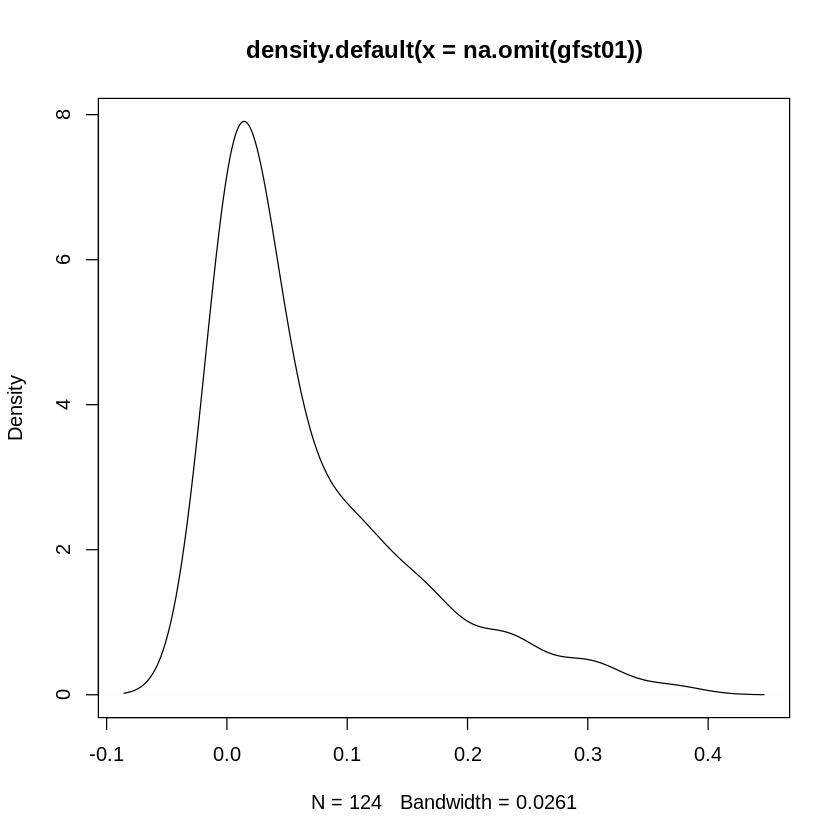

In [33]:
# density plots of per-gene Fst
plot(density(na.omit(gfst01)))

In [38]:
%expand
# adding results to genes table, saving
pct15genes$fst01=gfst01
id <- paste(pct15genes$contig,pct15genes$start,pct15genes$end,sep="_")
pct15genes <- cbind(id,pct15genes)
head(pct15genes[!is.na(pct15genes$fst01),])
save(pct15genes,file="{sfsSuf}_PerGeneFst.RData")

,id,contig,start,start15,end15,end,fst01
12,Contig103346_6131_16776,Contig103346,6131,7727,15180,16776,0.114973262
35,Contig27784_397_10761,Contig27784,397,1951,9207,10761,0.041095890
121,Contig282_28273_40182,Contig282,28273,30059,38396,40182,0.001795332
227,Contig28993_906_8396,Contig28993,906,2029,7273,8396,0.081395349
272,Contig92_19276_42960,Contig92,19276,22828,39408,42960,0.125000000
370,Contig42157_2034_10762,Contig42157,2034,3343,9453,10762,0.028571429


In [40]:
%expand
# saving table of per-gene Fst for GO_MWU analysis
f01=pct15genes[!is.na(pct15genes$fst01),]
nrow(f01)
write.table(f01,file="{sfsSuf}_15pctGeneFst.csv",quote=F,row.names=F,sep="\t")

[1] 124

## Pst vs Fst for random sites in genome  
### 1000 bp bins

In [41]:
sfsSuf = "SFS/HCSS_sfsm70"

In [1]:
module load gcc/6.2.0
module load xz/5.2.2 
module load bzip2/1.0.6
module load bedtools/2.29.0

In [2]:
bedtools makewindows -h


Tool: bedtools makewindows
Version: v2.29.0
Summary: Makes adjacent or sliding windows across a genome or BED file.

Usage: bedtools makewindows [OPTIONS] [-g <genome> OR -b <bed>]
 [ -w <window_size> OR -n <number of windows> ]

Input Options: 
	-g <genome>
		Genome file size (see notes below).
		Windows will be created for each chromosome in the file.

	-b <bed>
		BED file (with chrom,start,end fields).
		Windows will be created for each interval in the file.

Windows Output Options: 
	-w <window_size>
		Divide each input interval (either a chromosome or a BED interval)
		to fixed-sized windows (i.e. same number of nucleotide in each window).
		Can be combined with -s <step_size>

	-s <step_size>
		Step size: i.e., how many base pairs to step before
		creating a new window. Used to create "sliding" windows.
		- Defaults to window size (non-sliding windows).

	-n <number_of_windows>
		Divide each input interval (either a chromosome or a BED interval)
		to fixed number of windows (i.e

: 1

In [2]:
# use previously created genome fai file as the bedfile input
awk 'FS=OFS="\t"{print $1, 0, $2}' ../../Olurida_v081.fa.fai \
| bedtools makewindows -b - -w 100 > Olurida_v081_100Intervals.bed

In [3]:
# use previously created genome fai file as the bedfile input
awk 'FS=OFS="\t"{print $1, 0, $2}' ../../Olurida_v081.fa.fai \
| bedtools makewindows -b - -w 1000 > Olurida_v081_1kbIntervals.bed

In [6]:
head Olurida_v081_1kbIntervals.bed

Contig0	0	1000
Contig0	1000	2000
Contig0	2000	3000
Contig0	3000	4000
Contig0	4000	5000
Contig0	5000	6000
Contig0	6000	7000
Contig0	7000	8000
Contig0	8000	9000
Contig0	9000	10000


In [73]:
# reading regions
regions=read.table("Olurida_v081_1kbIntervals.bed")
names(regions)=c("contig","start","end")

In [74]:
# read in fst data
fst01=read.table("SFS/HCSS_sfsm70_fst2pop.fst")
names(fst01)=c("contig","pos","a","b")

fst01$contig=as.character(fst01$contig)

In [75]:
# removing zero-only (invariant) bases
fst01[,3:4]=round(fst01[,3:4],3)
ch01=apply(fst01[,3:4],1,sum)
chh=(ch01>0)
table(chh)

fst01=fst01[chh,]
head(fst01)

chh
 FALSE   TRUE 
363405   5882 

,contig,pos,a,b
64,Contig0,74432,0.000,0.009
82,Contig0,109103,0.034,0.457
98,Contig0,109119,0.003,0.052
102,Contig0,109123,0.002,0.067
114,Contig1,40362,0.000,0.009
169,Contig1,42880,0.003,0.078


In [ ]:
fst

In [11]:
# computing weighted Fst per region
i=1;gfst01=c();ns01=0
pb=txtProgressBar(0,nrow(regions))
for (i in 1:nrow(regions)) {
	setTxtProgressBar(pb,i)
	sub=subset(fst01,contig==regions$contig[i] & pos>=regions$start[i] & pos<=regions$end[i])
	if (is.null(sub[1,1]) | sum(sub$b)==0) { 
		gfst01=append(gfst01,NA)
	} else {
		gfst01=append(gfst01,sum(sub$a)/sum(sub$b))
		ns01=ns01+nrow(sub)
	}
}

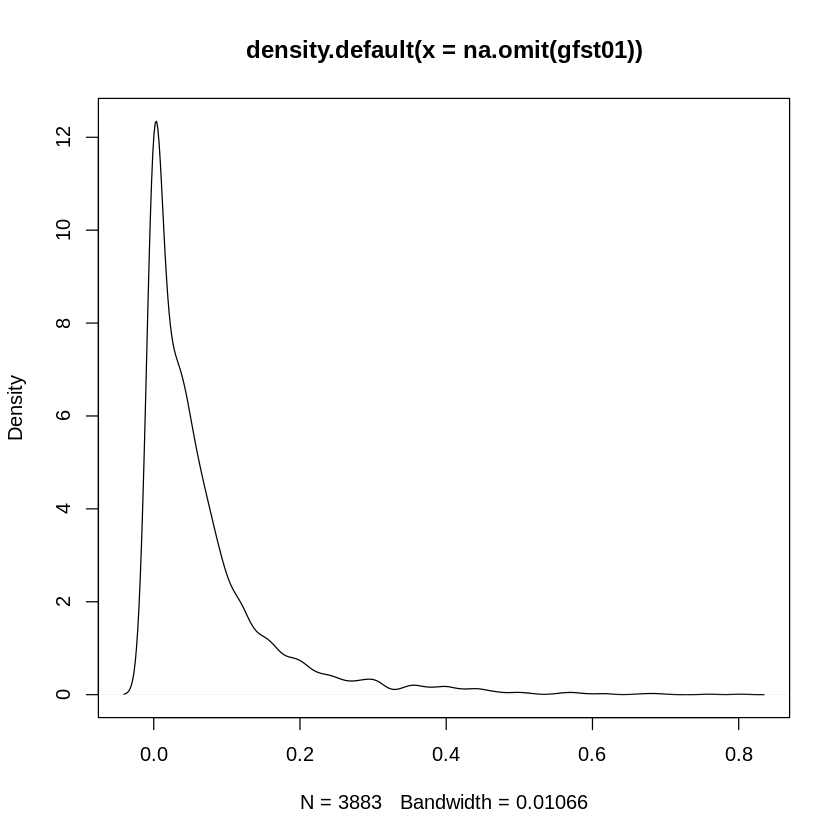

In [12]:
# density plots of per-region Fst
plot(density(na.omit(gfst01)))

In [18]:
%expand
#adding results to regions table, saving
regions$fst01=gfst01
regionsNA <- regions[!is.na(regions$fst01),]
head(regionsNA)
write.csv(regionsNA,file="{sfsSuf}_Per1kbFst.csv",quote=F,row.names=F)
#save bed file of intervals only with fst data


,contig,start,end,fst01
75,Contig0,74000,75000,0.00000000
110,Contig0,109000,110000,0.06770833
158,Contig1,40000,41000,0.00000000
160,Contig1,42000,43000,0.03846154
216,Contig2,10000,11000,0.02127660
342,Contig2,136000,137000,0.00000000


In [45]:
nrow(regionsNA)

[1] 3883

In [22]:
%expand
filtbed <- regionsNA[,c("contig","start","end")]
write.table(filtbed, "{sfsSuf}_1kb.bed",quote=F,row.names=F,col.names = F)

In [23]:
%expand
head {sfsSuf}_1kb.bed

Contig0 74000 75000
Contig0 109000 110000
Contig1 40000 41000
Contig1 42000 43000
Contig2 10000 11000
Contig2 136000 137000
Contig3 14000 15000
Contig4 51000 52000
Contig8 75000 76000
Contig9 17000 18000


#### Compare with overlappin Pst bins

In [52]:
%expand
regionsNA <- read.csv("{sfsSuf}_Per1kbFst.csv")
id <- paste(regionsNA$contig,regionsNA$start,regionsNA$end, sep = "_")
regionsNA <- cbind(id,regionsNA)
head(regionsNA)

id,contig,start,end,fst01
Contig0_74000_75000,Contig0,74000,75000,0.00000000
Contig0_109000_110000,Contig0,109000,110000,0.06770833
Contig1_40000_41000,Contig1,40000,41000,0.00000000
Contig1_42000_43000,Contig1,42000,43000,0.03846154
Contig2_10000_11000,Contig2,10000,11000,0.02127660
Contig2_136000_137000,Contig2,136000,137000,0.00000000


In [50]:
# read in Pst data
pst1kb <- read.csv("../../paper-oly-mbdbs-gen/analyses/methylation-filtered/Pst_bins_1kb.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst1kb) <- c("id","contig","start","end","pst","pst.lowCI","pst.highCI")
head(pst1kb)
nrow(pst1kb)

id,contig,start,end,pst,pst.lowCI,pst.highCI
Contig10074_5000_6000,Contig10074,5000,6000,0.25131285,0.0008842925,0.8672152
Contig100771_1000_1852,Contig100771,1000,1852,0.34311448,0.0015001933,0.8588288
Contig126977_2000_3000,Contig126977,2000,3000,0.62651934,0.0210034318,0.8771075
Contig128060_1000_1680,Contig128060,1000,1680,0.01810252,0.0005849085,0.8363022
Contig129509_0_1000,Contig129509,0,1000,0.24973351,0.0015760069,0.8427798
Contig132115_1000_1816,Contig132115,1000,1816,0.21746108,0.0009032690,0.8652226


[1] 71

#### 71 overlapping bins

In [57]:
both = merge(pst1kb,regionsNA, by ="id")
#both <- both[,c("id","pst","fst01")]
head(both)

id,contig.x,start.x,end.x,pst,pst.lowCI,pst.highCI,contig.y,start.y,end.y,fst01
Contig10074_5000_6000,Contig10074,5000,6000,0.25131285,0.0008842925,0.8672152,Contig10074,5000,6000,0.19201995
Contig100771_1000_1852,Contig100771,1000,1852,0.34311448,0.0015001933,0.8588288,Contig100771,1000,1852,0.14919355
Contig126977_2000_3000,Contig126977,2000,3000,0.62651934,0.0210034318,0.8771075,Contig126977,2000,3000,0.01584507
Contig128060_1000_1680,Contig128060,1000,1680,0.01810252,0.0005849085,0.8363022,Contig128060,1000,1680,0.04655870
Contig129509_0_1000,Contig129509,0,1000,0.24973351,0.0015760069,0.8427798,Contig129509,0,1000,0.04545455
Contig132115_1000_1816,Contig132115,1000,1816,0.21746108,0.0009032690,0.8652226,Contig132115,1000,1816,0.01709402



Call:
lm(formula = both$pst ~ both$fst01)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28231 -0.19942 -0.02921  0.14795  0.52908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.28394    0.03259   8.712 9.98e-13 ***
both$fst01  -0.10975    0.37560  -0.292    0.771    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2266 on 69 degrees of freedom
Multiple R-squared:  0.001236,	Adjusted R-squared:  -0.01324 
F-statistic: 0.08537 on 1 and 69 DF,  p-value: 0.771


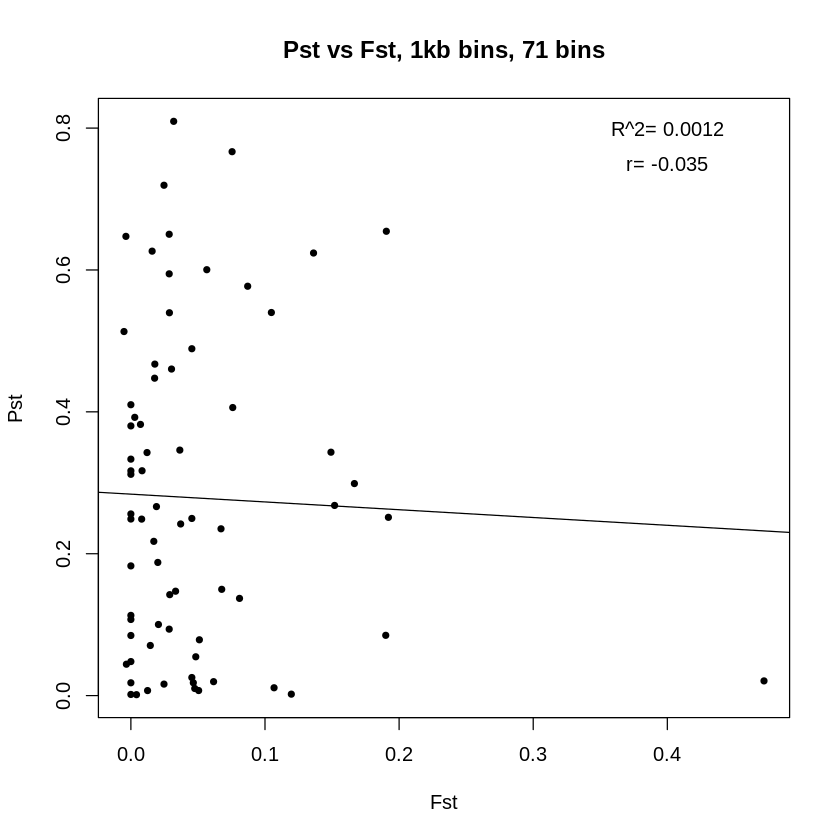

In [59]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(both$fst01, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 1kb bins, 71 bins")
summary(lm(both$pst~both$fst01),)
R2 = round(summary(lm(both$pst~both$fst01))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst01))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= -0.035")

In [58]:
cor.test( ~ both$pst + both$fst01,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst01, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst01
t = -0.29219, df = 69, p-value = 0.771
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2662733  0.1997889
sample estimates:
        cor 
-0.03515334 


Warning message in cor.test.default(x = c(0.251312849756899, 0.343114484406881, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  both$pst and both$fst01
S = 58217, p-value = 0.8435
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02385219 


#### Get gene annotations for these overlaps

In [8]:
module load gcc/6.2.0
module load bedtools/2.29.0

In [17]:
chr <- as.character(both$contig.x)
start <- both$startc +2000
end <- both$end.x-2000
fst <- paste(both$fst01, both$pst, sep="_")
bed <- cbind(chr,start,end,fst)

In [18]:
write.table(bed,"Results/fstpst_2kbslop.tab",row.names = F, col.names = F,quote = F, sep = "\t")

In [19]:
intersectBed \
  -wb \
  -a "../../paper-oly-mbdbs-gen/genome-features/Olurida_v081-20190709.gene.gff" \
  -b "Results/fstpst_2kbslop.tab" \
  > "Results/fstpst_2kbslop.genes"

In [31]:
both[which(both$fst01 >0.4),]

,id,contig.x,start.x,end.x,pst,contig.y,start.y,end.y,fst01,startc
35,Contig20413_1_17467,Contig20413,1,17467,0.02072460,Contig20413,1,17467,0.4720812,-1515
61,Contig24693_2452_15381,Contig24693,2452,15381,0.34105167,Contig24693,2452,15381,0.5007496,2452
75,Contig28902_528_13774,Contig28902,528,13774,0.31127971,Contig28902,528,13774,0.4283427,528
133,Contig50657_1_11990,Contig50657,1,11990,0.03393099,Contig50657,1,11990,0.4868217,-1888
149,Contig77382_1559_12918,Contig77382,1559,12918,0.41550369,Contig77382,1559,12918,0.6633523,1559


Low Pst, high Fst

In [22]:
grep "Contig20413" Results/fstpst_2kbslop.genes

Contig20413	maker	gene	486	15467	.	-	.	ID=OLUR_00010706;Name=OLUR_00010706;Alias=maker-Contig20413-snap-gene-0.3;Note=Similar to sll1388: Universal stress protein Sll1388 (Synechocystis sp. (strain PCC 6803 / Kazusa) OX%3D1111708);Dbxref=CDD:cd00293,Coils:Coil,Gene3D:G3DSA:3.40.50.620,InterPro:IPR006015,InterPro:IPR006016,InterPro:IPR014729,PRINTS:PR01438,Pfam:PF00582,SUPERFAMILY:SSF52402;	Contig20413	485	15467	0.472081218274112_0.0207245979022085


In [26]:
grep "Contig50657" Results/fstpst_2kbslop.genes

Contig50657	maker	gene	113	9990	.	+	.	ID=OLUR_00017738;Name=OLUR_00017738;Alias=maker-Contig50657-snap-gene-0.3;Note=Similar to KDM3B: Lysine-specific demethylase 3B (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:2.60.120.650,InterPro:IPR003347,MobiDBLite:mobidb-lite,Pfam:PF02373,ProSiteProfiles:PS51184,SMART:SM00558,SUPERFAMILY:SSF51197;	Contig50657	112	9990	0.486821705426357_0.0339309902311326


In [97]:
wc -l SFS/HCSS_sfsm70_slidingwindow

2773 SFS/HCSS_sfsm70_slidingwindow


### 10,000 bp bins

In [24]:
# use previously created genome fai file as the bedfile input
awk 'FS=OFS="\t"{print $1, 0, $2}' ../../Olurida_v081.fa.fai \
| bedtools makewindows -b - -w 10000 > Olurida_v081_10kbIntervals.bed

In [25]:
head Olurida_v081_10kbIntervals.bed

Contig0	0	10000
Contig0	10000	20000
Contig0	20000	30000
Contig0	30000	40000
Contig0	40000	50000
Contig0	50000	60000
Contig0	60000	70000
Contig0	70000	80000
Contig0	80000	90000
Contig0	90000	100000


In [35]:
# reading regions
regions=read.table("Olurida_v081_10kbIntervals.bed")
names(regions)=c("contig","start","end")

In [36]:
# read in fst data
fst01=read.table("SFS/HCSS_sfsm70_fst2pop.fst")
names(fst01)=c("contig","pos","a","b")

fst01$contig=as.character(fst01$contig)

In [37]:
# removing zero-only (invariant) bases
fst01[,3:4]=round(fst01[,3:4],3)
ch01=apply(fst01[,3:4],1,sum)
chh=(ch01>0)
table(chh)

fst01=fst01[chh,]
head(fst01)

chh
 FALSE   TRUE 
363405   5882 

,contig,pos,a,b
64,Contig0,74432,0.000,0.009
82,Contig0,109103,0.034,0.457
98,Contig0,109119,0.003,0.052
102,Contig0,109123,0.002,0.067
114,Contig1,40362,0.000,0.009
169,Contig1,42880,0.003,0.078


In [38]:
# computing weighted Fst per region
i=1;gfst01=c();ns01=0
pb=txtProgressBar(0,nrow(regions))
for (i in 1:nrow(regions)) {
	setTxtProgressBar(pb,i)
	sub=subset(fst01,contig==regions$contig[i] & pos>=regions$start[i] & pos<=regions$end[i])
	if (is.null(sub[1,1]) | sum(sub$b)==0) { 
		gfst01=append(gfst01,NA)
	} else {
		gfst01=append(gfst01,sum(sub$a)/sum(sub$b))
		ns01=ns01+nrow(sub)
	}
}

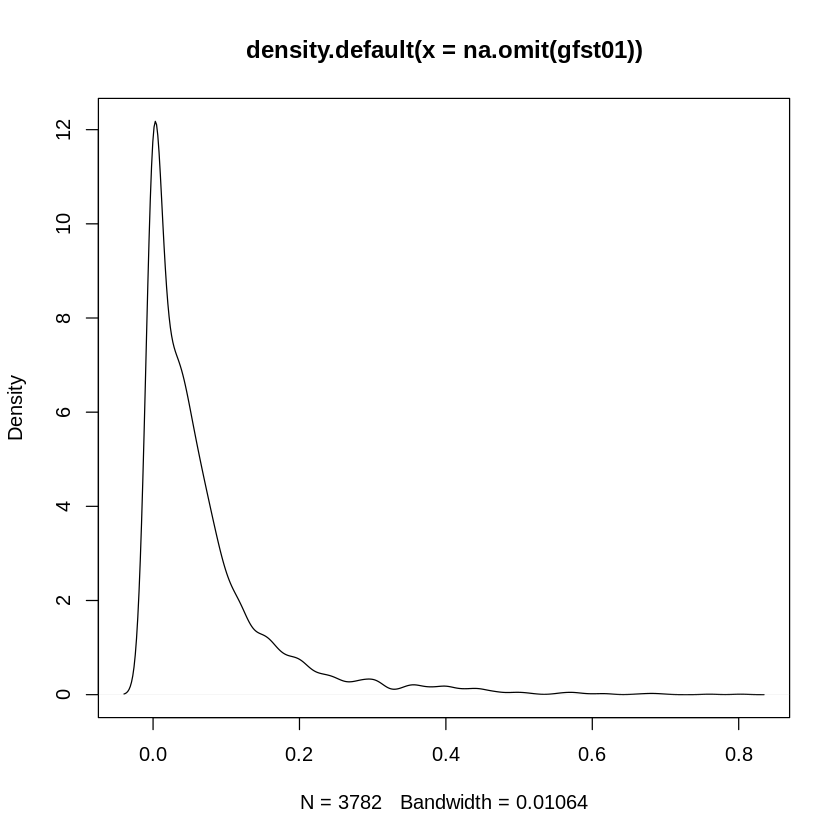

In [39]:
# density plots of per-region Fst
plot(density(na.omit(gfst01)))

In [40]:
%expand
#adding results to regions table, saving
regions$fst01=gfst01
regionsNA <- regions[!is.na(regions$fst01),]
head(regionsNA)
write.csv(regionsNA,file="{sfsSuf}_Per10kbFst.csv",quote=F,row.names=F)
#save bed file of intervals only with fst data

,contig,start,end,fst01
8,Contig0,70000,80000,0.00000000
11,Contig0,100000,110000,0.06770833
17,Contig1,40000,50000,0.03448276
23,Contig2,10000,20000,0.02127660
35,Contig2,130000,139250,0.00000000
37,Contig3,10000,20000,0.25287356


In [41]:
nrow(regionsNA)

[1] 3782

In [42]:
%expand
filtbed <- regionsNA[,c("contig","start","end")]
write.table(filtbed, "{sfsSuf}_10kb.bed",quote=F,row.names=F,col.names = F)

#### Compare with overlappin Pst bins

In [60]:
%expand
regionsNA <- read.csv("{sfsSuf}_Per10kbFst.csv")
id <- paste(regionsNA$contig,regionsNA$start,regionsNA$end, sep = "_")
regionsNA <- cbind(id,regionsNA)
head(regionsNA)

id,contig,start,end,fst01
Contig0_70000_80000,Contig0,70000,80000,0.00000000
Contig0_100000_110000,Contig0,100000,110000,0.06770833
Contig1_40000_50000,Contig1,40000,50000,0.03448276
Contig2_10000_20000,Contig2,10000,20000,0.02127660
Contig2_130000_139250,Contig2,130000,139250,0.00000000
Contig3_10000_20000,Contig3,10000,20000,0.25287356


In [61]:
# read in Pst data
pst10kb <- read.csv("../../paper-oly-mbdbs-gen/analyses/methylation-filtered/Pst_bins_10kb.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst10kb) <- c("id","contig","start","end","pst","pst.lowCI","pst.highCI")
head(pst10kb)
nrow(pst10kb)

id,contig,start,end,pst,pst.lowCI,pst.highCI
Contig0_70000_80000,Contig0,70000,80000,0.6136306,0.011347886,0.8948949
Contig10074_0_6621,Contig10074,0,6621,0.2513128,0.001205032,0.8501561
Contig100771_0_1852,Contig100771,0,1852,0.3431145,0.001595068,0.8617699
Contig10259_0_9151,Contig10259,0,9151,0.2439721,0.000979882,0.8090206
Contig103223_10000_14834,Contig103223,10000,14834,0.3743660,0.001878200,0.8601134
Contig104217_0_5491,Contig104217,0,5491,0.4712576,0.011812632,0.8385497


[1] 271

#### 271 overlapping bins

In [62]:
both = merge(pst10kb,regionsNA, by ="id")
#both <- both[,c("id","pst","fst01")]
head(both)

id,contig.x,start.x,end.x,pst,pst.lowCI,pst.highCI,contig.y,start.y,end.y,fst01
Contig0_70000_80000,Contig0,70000,80000,0.6136306,0.011347886,0.8948949,Contig0,70000,80000,0.0000000
Contig10074_0_6621,Contig10074,0,6621,0.2513128,0.001205032,0.8501561,Contig10074,0,6621,0.1920200
Contig100771_0_1852,Contig100771,0,1852,0.3431145,0.001595068,0.8617699,Contig100771,0,1852,0.1491935
Contig10259_0_9151,Contig10259,0,9151,0.2439721,0.000979882,0.8090206,Contig10259,0,9151,0.1026694
Contig103223_10000_14834,Contig103223,10000,14834,0.3743660,0.001878200,0.8601134,Contig103223,10000,14834,0.0000000
Contig104217_0_5491,Contig104217,0,5491,0.4712576,0.011812632,0.8385497,Contig104217,0,5491,0.0000000



Call:
lm(formula = both$pst ~ both$fst01)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27271 -0.19651 -0.02384  0.14066  0.72989 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.272758   0.016211  16.826   <2e-16 ***
both$fst01  -0.009332   0.143242  -0.065    0.948    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.22 on 269 degrees of freedom
Multiple R-squared:  1.578e-05,	Adjusted R-squared:  -0.003702 
F-statistic: 0.004245 on 1 and 269 DF,  p-value: 0.9481


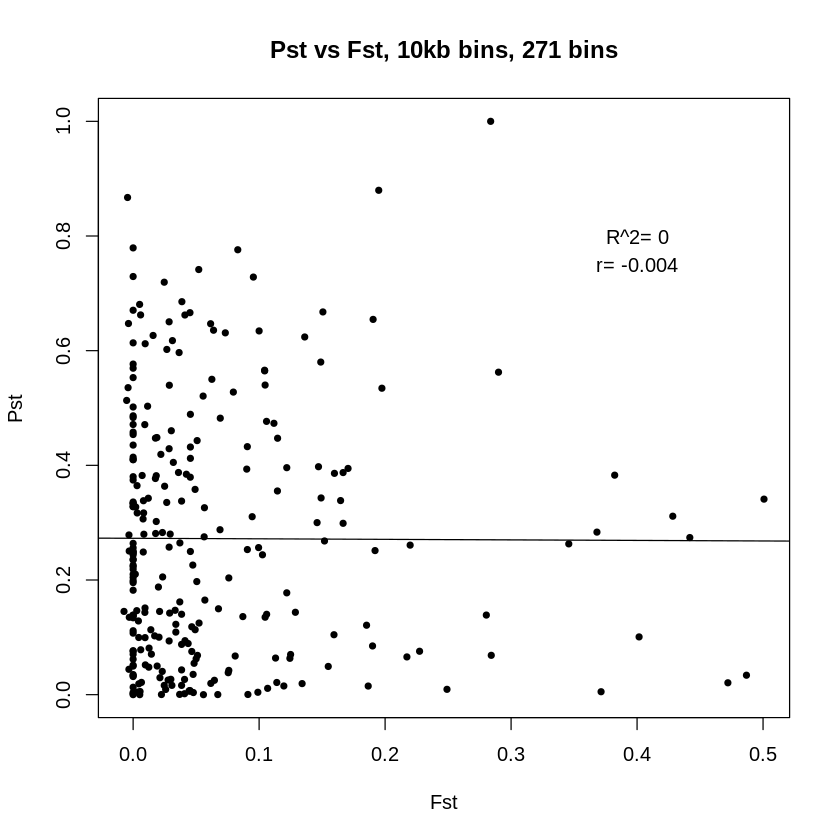

In [66]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(both$fst01, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 10kb bins, 271 bins")
summary(lm(both$pst~both$fst01),)
R2 = round(summary(lm(both$pst~both$fst01))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst01))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= -0.004")

In [64]:
cor.test( ~ both$pst + both$fst01,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst01, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst01
t = -0.065151, df = 269, p-value = 0.9481
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1230691  0.1152373
sample estimates:
         cor 
-0.003972307 


Warning message in cor.test.default(x = c(0.613630567871362, 0.251312849756899, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  both$pst and both$fst01
S = 3376696, p-value = 0.7682
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0179847 


# Correlating PC scores for genetic and epigenetic

### All methylation data

In [26]:
# Read in PC scores from epigenetics
ep <- read.table("../analyses/methylation-filtered/PC-scores-filtered-methylation.tab",
                 header=T, sep="\t",row.names = "sample")

Add sample names to PC score matrix

In [27]:
key = read.csv("../data/sample-key.csv",colClasses = c("character","character"))

In [28]:
samples = rownames(ep)
mapdf <- data.frame(old=key$X...MBD.FILENAME,new=key$SAMPLE)
rownames(ep) <- mapdf$new[match(samples,mapdf$old)]

In [29]:
ep

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
hc1_2,-6.692850,4.371347,17.3591858,-9.77823057,0.03392218,-29.86492405,35.5278752,30.6193584,-4.9343922,1.6809432,-0.33319001,3.635139,-7.4010422,-1.7594517,3.1929463,0.78578319,-4.4636713,-2.304060e-14
hc1_4,-1.070833,15.671612,-0.3928227,-1.70710015,41.23235880,35.77341278,2.2218207,22.6387392,9.6957465,-0.1030809,-0.86444586,7.793098,2.1127411,-1.9011238,1.0629236,2.77676877,0.2719266,-4.127601e-14
hc2_15,-12.299954,10.306976,-8.1557636,-2.70502528,18.69976530,-31.90777310,-18.5266121,-11.0064755,32.4791342,-12.9709720,-12.42688061,6.839118,-5.7880514,-0.1922841,2.8387897,0.27435155,2.0688240,-2.724470e-14
hc2_17,-20.447126,9.462505,-2.1141525,4.20049318,11.22313158,-0.77622031,0.7696665,-5.0742263,-2.9998595,-1.6355382,15.84724957,-44.577822,-11.9680384,6.4587427,-9.2348469,-8.24820025,-1.5929793,1.984524e-14
hc3_1,39.034523,48.607826,-14.8380393,24.54435834,-20.88827041,3.21539341,13.3872950,-6.7302612,5.4916718,-3.3313800,0.04068923,1.333991,0.3918315,1.5024459,-0.5308704,2.08230580,-0.6792729,-1.282481e-14
hc3_5,-4.158491,15.894780,56.6155610,-2.33521782,-19.01246614,7.46016914,-25.9280178,3.7768436,0.2410256,-3.1401753,1.99055907,2.008911,-3.5426766,-0.3045020,0.8488112,-0.11514156,1.4576012,1.117509e-14
hc3_7,-3.864274,15.873938,-20.7614296,2.15581022,7.59235360,-16.98380550,-28.4280712,11.2734120,-33.2551537,19.2619936,4.18859370,7.355386,7.3000877,-5.3908788,-0.3526813,-0.96549984,1.6868523,-3.011653e-14
hc3_10,-26.775638,5.285006,16.3128676,3.29961637,11.01994934,-0.50438638,19.8221442,-30.5733695,-9.8219832,4.1390918,-10.16929815,3.537457,30.0290917,-6.4407773,-8.5153142,0.40346723,4.6974825,-2.846074e-14
hc3_11,27.358771,4.769939,-8.5306352,-59.71357725,-3.74778573,4.63932148,1.8642351,-13.3416913,-4.0485879,-6.2794531,8.25416810,-1.321221,1.6583165,-1.7369624,3.7856504,-0.97944952,0.8468419,-1.080733e-14
ss2_9,6.465812,-14.429699,-9.6526527,-1.47541437,-13.23682631,4.77846200,-6.5708353,18.3475636,-5.9277610,-17.3833320,-36.74039835,-16.780138,16.3704203,11.1439572,-1.2996767,-0.69204759,-0.3559637,4.914472e-15


In [30]:
pwd

/scratch/t.cri.ksilliman/CommonG_cp2/2019_Mapping/paper-oly-mbdbs-gen/code


In [32]:
%expand
gen <- read.table("../analyses/2bRAD/PCA_MBD.tab")
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
rownames(gen) <- mbdorder
gen
#make sure ep and gen in same order
ep <- ep[mbdorder,]
pop = as.factor(c(rep("Hood Canal",9),rep("South Sound",9)))

,Axis1,Axis2,Axis3,Axis4,Axis5,Axis6,Axis7,Axis8,Axis9,Axis10
hc1_2,-30.854349,62.5029187,-39.126699,-6.6825527,8.3221461,-0.7086301,17.31752495,0.2936824,0.8989264,-0.4304196
hc1_4,-36.763282,-28.0754232,-8.433215,7.6647431,-1.6184628,-31.0590303,-9.85733408,-8.3973498,-27.8566307,-0.9438271
hc2_15,-19.186846,-5.1842818,7.364130,13.1351679,-4.3885497,12.5090228,-22.74730997,24.8400420,-65.7538216,13.3349372
hc2_17,-40.206860,-36.1052704,-12.322371,9.6876736,2.6352766,-58.6181161,-13.75887353,-23.7416069,23.5703357,-6.2352104
hc3_1,-37.826431,-36.9425236,-5.509531,1.5182548,-4.6922389,48.6833461,23.36238039,9.7129216,21.5883136,-3.5359827
hc3_5,-30.143595,55.0231332,-36.232789,-5.3620760,1.0088379,-0.7074565,14.19324850,-9.9157602,-3.6163448,3.2526797
hc3_7,-43.147805,-40.1710198,-7.611759,6.9393388,-9.1940329,29.4454896,18.74448269,7.3807219,8.6393640,1.3948325
hc3_10,-17.172389,33.7748409,24.531325,27.0312124,-9.5971793,24.1575625,-70.84911452,-1.7834835,30.1787592,-6.5042378
hc3_11,-19.210537,6.7854536,48.358675,-88.8792487,-16.0479717,-4.6882967,-2.86392273,-4.8219621,-1.9727997,-1.3126761
ss2_9,32.194738,-0.7473875,-7.026195,-3.7966904,-10.6699487,-9.2404659,-0.26173671,29.4099581,13.9874923,-23.9188879


In [33]:
pop

[1] Hood Canal  Hood Canal  Hood Canal  Hood Canal  Hood Canal  Hood Canal 
 [7] Hood Canal  Hood Canal  Hood Canal  South Sound South Sound South Sound
[13] South Sound South Sound South Sound South Sound South Sound South Sound
Levels: Hood Canal South Sound


Call:
lm(formula = gen$Axis1 ~ ep$PC2)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.295 -11.713  -5.483  11.026  38.773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.198e-15  4.307e+00   0.000        1    
ep$PC2      -1.576e+00  2.426e-01  -6.495 7.39e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.27 on 16 degrees of freedom
Multiple R-squared:  0.725,	Adjusted R-squared:  0.7078 
F-statistic: 42.18 on 1 and 16 DF,  p-value: 7.392e-06


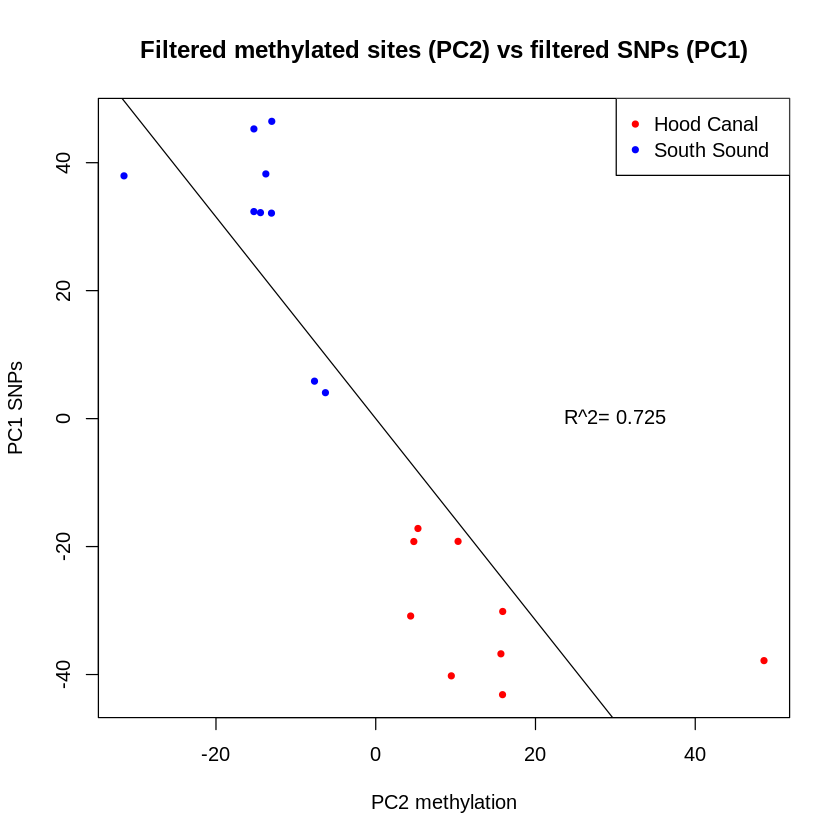

In [38]:
palette(c("red","blue"))
plot(ep$PC2,gen$Axis1, pch=20,cex=1,xlab = "PC2 methylation", ylab = "PC1 SNPs",col=pop)
legend('topright', legend = levels(pop), col = c("red","blue"), cex = 1, pch = 20)
title("Filtered methylated sites (PC2) vs filtered SNPs (PC1)")
summary(lm(gen$Axis1~ep$PC2),)
R2 = round(summary(lm(gen$Axis1~ep$PC2))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(gen$Axis1~ep$PC2))
text(30,0.3,label=paste("R^2=",R2))
#text(ep$PC2,gen$Axis1, labels=rownames(ep), cex=0.9, font=2)

In [23]:
cor.test( ~ ep$PC2 + gen$Axis1,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ ep$PC2 + gen$Axis1, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  ep$PC2 and gen$Axis1
t = -6.4948, df = 16, p-value = 7.392e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9433396 -0.6383730
sample estimates:
       cor 
-0.8514725 



	Spearman's rank correlation rho

data:  ep$PC2 and gen$Axis1
S = 1804, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8617131 


### DMLs

In [39]:
# Read in PC scores from epigenetics
ep <- read.table("../../paper-oly-mbdbs-gen/analyses/DMLs/PC-scores-DMLs.tab",
                 header=T, sep="\t",row.names = "sample")

Add sample names to PC score matrix

In [40]:
key = read.csv("../../paper-oly-mbdbs-gen/data/sample-key.csv",colClasses = c("character","character"))

In [41]:
samples = rownames(ep)
mapdf <- data.frame(old=key$X...MBD.FILENAME,new=key$SAMPLE)
rownames(ep) <- mapdf$new[match(samples,mapdf$old)]

In [42]:
ep

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
hc1_2,2.58520529,2.52082478,-1.2085058,0.42322452,0.54325748,0.1039631,-0.12694825,0.76376345,-0.96942144,0.26802083,0.28865161,-1.51780782,0.445506029,-0.12625313,0.1374234782,-0.405429804,-0.004794839,3.330669e-16
hc1_4,3.37080780,-2.03165236,0.8702686,-1.29204441,1.91824968,-0.4996976,0.47911154,0.31219593,0.35561796,0.80971097,0.02913808,0.74960408,0.446178287,0.07594788,-0.0002381671,-0.673094503,-0.135790637,-2.498002e-16
hc2_15,3.86829394,-1.33681409,0.8650964,0.78709933,-1.26146005,0.1721864,0.56342577,-0.88795865,-0.37425513,-0.80642763,0.80413379,0.04505579,0.379095401,-0.90594140,0.3619052557,0.223859298,-0.273138785,1.026956e-15
hc2_17,3.38228858,-0.79641793,-1.4876656,-1.25664040,1.33311484,0.6280170,0.11835032,0.50985459,0.59488917,-1.38658333,-0.59549147,-0.19059968,0.066777983,-0.30390921,-0.9218117044,0.217071952,0.093162128,7.632783e-16
hc3_1,1.81393178,-0.67259628,2.9870456,-0.40833186,-0.96025334,-0.8174120,-1.02180183,0.91534553,-0.92598761,0.98324685,-0.64844127,-0.10305661,-0.135350626,-0.55412374,-0.2333078766,0.277394323,0.218305193,-4.163336e-17
hc3_5,3.15464787,1.72341264,-1.1378371,-0.05172669,1.01491175,-0.8237016,0.87441578,0.89248770,-0.20670025,0.26927195,0.92423115,0.80427163,0.124159134,0.40792642,0.3863396250,0.562323232,0.195555875,-4.059253e-16
hc3_7,3.03723117,-2.21797016,0.5758374,0.82823062,-2.29779396,-0.1390859,0.01737066,0.38127916,0.42014818,-0.85970261,0.16518251,-0.31089880,-0.278629464,0.98636768,0.2374751890,-0.291878869,0.210038774,-4.128642e-16
hc3_10,3.12657476,2.05163630,-1.4785213,2.64148283,-0.56936840,0.1551002,-0.50077137,-0.37443424,0.85983088,0.36632514,-0.67663699,0.71482050,-0.818042865,-0.47403996,0.0124800260,-0.267051183,0.003900828,6.938894e-17
hc3_11,1.90514384,-0.10053224,-0.2313423,-0.02410457,1.00028093,-1.0818482,-1.08862894,-2.84220098,-0.68173469,0.30161141,-0.22254763,-0.25552827,-0.009977519,0.67586623,-0.2296772481,0.210401103,-0.042430308,5.412337e-16
ss2_9,-3.29604933,-0.36696617,-1.1240478,-1.64678552,-0.03140524,-1.1444626,-2.12193257,0.06073731,1.59177805,-0.14269409,0.03296847,-0.21700577,0.298625486,-0.34382530,0.7520590765,0.067221294,0.038251681,-1.665335e-16


In [43]:
%expand
#make sure ep and gen in same order
ep <- ep[mbdorder,]


Call:
lm(formula = gen$Axis1 ~ ep$PC1)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6633  -4.4790   0.5534   5.5348  19.5469 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.294e-15  2.333e+00    0.00        1    
ep$PC1      -1.001e+01  7.414e-01  -13.51 3.65e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.896 on 16 degrees of freedom
Multiple R-squared:  0.9194,	Adjusted R-squared:  0.9143 
F-statistic: 182.4 on 1 and 16 DF,  p-value: 3.647e-10


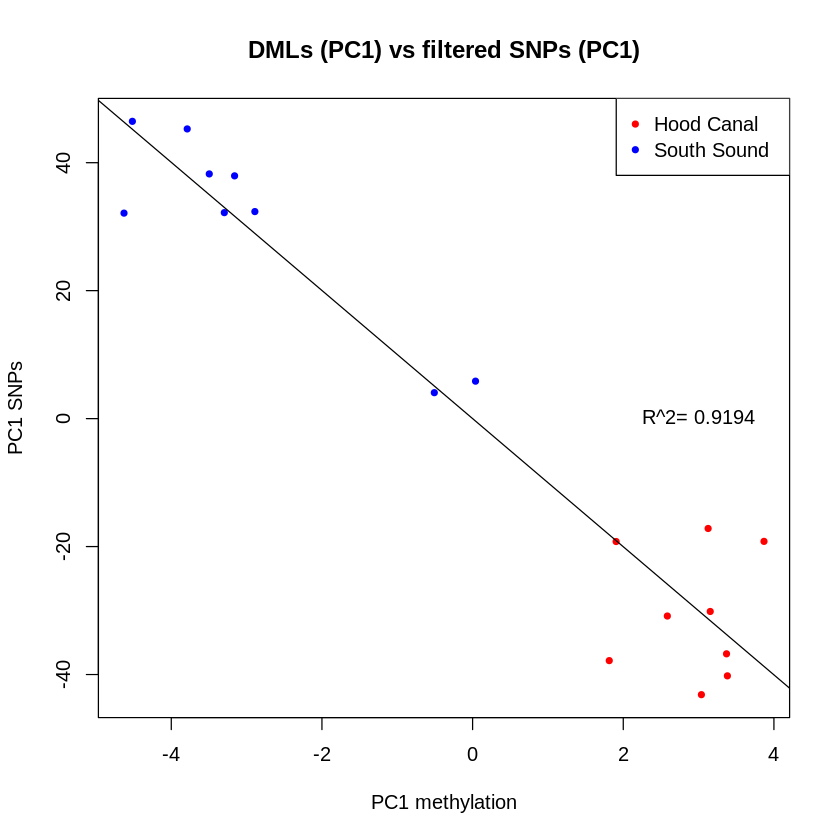

In [45]:
palette(c("red","blue"))
plot(ep$PC1,gen$Axis1, pch=20,cex=1,xlab = "PC1 methylation", ylab = "PC1 SNPs",col=pop)
legend('topright', legend = levels(pop), col = c("red","blue"), cex = 1, pch = 20)
title("DMLs (PC1) vs filtered SNPs (PC1)")
summary(lm(gen$Axis1~ep$PC1),)
R2 = round(summary(lm(gen$Axis1~ep$PC1))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(gen$Axis1~ep$PC1))
text(3,0.3,label=paste("R^2=",R2))

In [47]:
cor.test( ~ ep$PC1 + gen$Axis1,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ ep$PC1 + gen$Axis1, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  ep$PC1 and gen$Axis1
t = -13.505, df = 16, p-value = 3.647e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9848379 -0.8906634
sample estimates:
       cor 
-0.9588292 



	Spearman's rank correlation rho

data:  ep$PC1 and gen$Axis1
S = 1752, p-value = 6.248e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8080495 


# CpG-SNPs  
count all CpG-SNPs in genome using maf > 0.05 SNPs from full dataset  [site](https://www.bioconductor.org/packages/release/bioc/vignettes/ramwas/inst/doc/RW2_CpG_sets.html)  
see how many CpGs are in cis/trans sites
Do MACAU  
* correct for cis-SNPs, trans-SNPs

In [1]:
library(ramwas)
library(Biostrings)

Loading required package: filematrix

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:filematrix':

    colnames, rownames


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which, which.m

In [2]:
# read in genome
genome = readDNAStringSet("../../Olurida_v081.fa")

In [35]:
head(genome)

  A DNAStringSet instance of length 6
     width seq                                              names               
[1] 116746 CCTTTGAAGGGGGTCTGGTCCTT...AATATTCGTAAGACAGTTATTT Contig0
[2]  87411 ACACCGCATTCACGGCGTTTTAC...GAAGGCTCGAACCATGATTTTT Contig1
[3] 139250 CGTATCGTACCAATGTGCCGTGA...ACCAAAAAAAGGCACAGATTTG Contig2
[4] 141657 CAAAATTCCTGGATCCGCCCCTG...GGGTAGATCATATGCCTGATGT Contig3
[5]  95692 CCTTCAACTAGGGACGACCCCCC...GTAAGGGGAGGGGGGGCCAAGT Contig4
[6] 130522 CATGAATTCATTATAAGCATGTT...AAATATGAAGCAGATATGTCTG Contig5

In [46]:
length(genome)

[1] 159429

In [30]:
js("pwd")

/gpfs01/home/kes0132/CommonG_cp2/2019_Mapping/paper-oly-mbdbs-gen/code


In [29]:
js("module load vcftools/v0.1.17")
system("vcftools --vcf ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf --counts --out ../analyses/2bRAD/MethGen/count_HCSS_Afilt32m70_01_pp90")

Warning message in system("vcftools --vcf ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf --counts --out ../analyses/2bRAD/MethGen/count_HCSS_Afilt32m70_01_pp90.txt"):
"error in running command"


In [4]:
r <- readLines("../analyses/2bRAD/MethGen/count_HCSS_Afilt32m70_01_pp90.frq.count")
r1 <- r[1]

In [60]:
r <- readLines("../analyses/2bRAD/MethGen/count_HCSS_Afilt32m70_01_pp90.frq.count")
r1 < r[1]

getContigs <- function(contig,freq)
for (x in r[2:length(r)]){
    
}


[1] "CHROM\tPOS\tN_ALLELES\tN_CHR\t{ALLELE:COUNT}"
[2] "Contig0\t109103\t2\t208\tC:158\tG:50"        
[3] "Contig0\t109119\t2\t228\tT:217\tC:11"        
[4] "Contig0\t109120\t2\t214\tG:211\tA:3"         
[5] "Contig0\t109123\t2\t212\tT:200\tG:12"

In [55]:
as.character((genome[[1]]))

[1] "CCTTTGAAGGGGGTCTGGTCCTTCATTTAAATAAACGTGAAGCCCCTTTAACCAAAGATAATGTGTACCAAATTTGGTTGAACTTTGGTCCCAGCGGTTCTTGAGAAGAAGTAGAAAAATGTGAAAACTTAACGGACAGACAAGACGGACGGATCAGACGACGTACAAAAGGTGATCAGAATAGCTCACTTGAACCTTCGTTCAGGTGAGCTAAAAACAACAACAAAACAATTGTTCACTCGAGTGTTTACGTCAAGAGCGATAACTCGCATCGTCCGTTAGATGGCAATTCAGTCGCGACTAAATCAGCCAAGGGTAGATTAGAGTAAGCGAATCGGACACTTGGCCGCGAAGATGTGTCAAAGTAGGTGTGACACACAAAAGAACCCTCACTGCGAAAAAGCCATAAGTTCGCTAGGATCTAAATATTTGTACAACAGATTACAACTGGTAATCACCAACATGTTGCTTTCATTATTTTCGGTATTTGGACAGATTTTGTTAAATAGCCATCCGGAACATTCTAAATACACGTAACTACTGCTTGTCCTAACTTCCTTAAAACAAATCAAATGAAAAACGTCGGTGTTGTGTGTTGAACATATTTTATTGTACAATAATATACAAATGAATTGGATACAAGTTCTTGCAACTTAATGATCCTCATCAAAAAACTTTGGTGTAACTGTATTTCCTACAAATATACTATCAAGTAGAATAGGATTAAACCCTTCCACTTTCCCGCATATTACATTTATCCCTGTTCCCATGGTTTCGTTTTCCGTTCCAATCTGGCTGTTGTGGGTTCAACTTCTAAAGGTCTAATACCTAGCTCAGTTATACCCGGTAATGACAGACCTTTCGAAATCATTTCCACAACCTGGCCAAAATCATAAACTTTCTCGTGTTCTTTCTCTGACTCTTTATTTATGTCTGCCTGGGAGTTAAACTGGCCGCACAACTCCTCACTAGAGATCCCGTCCTGTGTGAGATCAGTACCCTCGTCAGTGTTACATAGTTTAGCCATCTTTGTCTCGTCATCACTGAATACACTCTCGTCAATACTTTTTTCTGTGGATTTACGATTCATATTTCTTTGTTCACAATCTACTGTTCTTTGATCTGAAATATGCGCAACAAATACATGTAAATTTATATCAACAAAACTAACGCGCAACAAATACATGTAATTCGGTAAAGCAACACATTTCAAAAACGACTAAAAGGAAAACCAGATTTTTGCTTTATATATAGAATTAACACATTTTAAGGTATGGAATGAAATTTATTGTCATGGTTTCTCAATTAAGTTCGAAAAACTCTTGTGTGTGTGTGTGGTGGGGGGGGGGGGTATAGTGTTACATACCAATTTCATAGGAGGATATAGAGGGGGAGCCAGGGGGCCGCAAGGCGAGAGGAAACAAAGGGCCAATCTACCCAGTGGAAACAGGGATTGGGTTTCTTTTTCCTTCGCCTGAAGCAGTTTTACAAACAGTTCTCAAACTTCATAATCACCTTTCTGTTTTGAATACTTTCAATATTCCGAAGAATCAGGATCAATTTGAATTACCATACCTTTACTGGATTCCGAAATTGCATAAGAATCTTTACAAACAAAGATACATCGCTGGTTCCAGTAAGTGCTCTACCAAGCCTCTATCCTTACTACTAACTAAACTACTAACAACTGTTAAAGAGTCACTTCAGAGATACTGTTCCACTACATATTCCAGAAGTGGTGTCAATCAGATGTGGATTCTCAAAAACTCTAAAGAGCTTTTAGAAAGAGCTTTTAGAGATTGTTCTAAAATTGACTGCATCAAAAACGAATGATTTCTCCACACTTTATACAACAATTCCTCACGATAAATTAAAATCTGGGCTTTTTCAGATAATGGATAATTGCTTTTCGAACAACATTGGCACCCGAAAATACAAGTTTCTGGTCGCTGGGAAACAAGATACATATTTTGTCAGAATCCACTCTGATTGCCCACACAAGTACTCTGAAGTAGATATTAAGAACATGCTTGGGTTTCTTATAGATAATATTTATGTAGTCTTTGGAGACCAGGTCTTCCAACAATCCGTTGGTATTCCTATGGGCACTAATTGTGCCCCCTTATTGGCAGGCTTATTTTTATATTCATACGAAGCAGAATTTGTTAAAAAACTGTTACGGGATAAAAACAAAAAAACTTGCCGTGTTCTTCAACCTTACATATAAGTATATAGACGATGTCTTATCAATTAACAATCATAGTTTTCACAATTATGTCCATTTGATATATCCTGACGAACTCGAAATAAAGGACACCACAGAATCTGACAGATCTGCTTCATATTTGGATACTTTAATTAATATTGACTCTAATGGCATTATGGCAGACTGACCAACTACATTATATGATAAACGTGATGATTTTGACTTTGCAATCGCACCTTCCTTTTCTATGTAGTAATGTACACTAGCACCTGCTTATGGTGTGTAATGTCTCTCAGTTGATTCGATACGCAATACGAAAGGGCTTGCCATGCGTATGAGGACTTTTTAAAGCGGGGCCAACTACTAACCAAAAAGCTGATGTTGCAGGGTTATAACGAATCTCGTTTAAAGTCACCATTTCGCAAATTCTACGGTCTCTATAATGACCTTGTTTGCCATTACAAATTATCACTAAGTCATATGTTGACTGATTTGTTTCATAACCTTTGTTAGATTATCATTTTCGTACTAGATTTGACGACGGGTAACCCCGTTTACTTTGTTTCGACTACGGGCTCACGGCGAGTGTAACCGGTCAACAGAGGATACTTACTCCCCCATGGCACCTGATCCTGCCTTCGCTTTTGTCGGAGGTCCGTTTTACCTTACACTCGATTTGTATATATGTTTTTGGACTTTGATTACGTTTAACACATTGTTTCCTTCGCCATTTTACATGTGTTTGAAACTGAAATATGATTTTGAAGATTCTTGTCTTTTGAAAGAGCAGTAGGAGTGTAAGTGCAATTACCAAATGTGGAGTTAATACCAAATTCGTTTAAAATGCAGATCTTTGTAGTAATGAGCCTTACAGACAAAGACACTATTGTTACAAGCTTTGTCAGTTGGAACCAAAACATATTCTTCGTGTAACATATCTAATTCTTTGATCACTTCTGGTGTACGAAACACAGAAGGATATATATGGTACGTACTTTGGTACGTATACATGTATGTCTAATACGGGATTTTAATACTTTTAACCCATTCTGATATATCATCCAAACTATCAGCTACAAACTCAGGAACTTACAGATTTAAAGTCAGAACTCCCAGTTCCTTTCTTACTTATGGGCGATTTTAATGCTTGTGACCCTCTATGGGGTAGTGATAAAGGTACGAAACTGGAAGATGCCATATCTCACAACTATCCTTGTATTTTAAACGACGGTTCAAACACTTGTCTTCATCCGGGCAATGGTTCATATTCTTCAGTTAGATCCCTCTTTACTCTTGGACTTAAACTTGTCTGTACATGATTTGTGCGAAGGCGAGCATTTCCCTATTACATGTATTGTTAAAGTAAACAATCCTTCAGAAAACAGTCCTGTACAAAATTGGAAACTCGAAAAAGCTTATTGGCCACGTTTCGAAGCTCTGTGTTGGCAAGATATCTCAACTGAAAAGTTTAGAAATCCCCCAGACCCCATTCAAAAATTTACCGAAAATTAATTACAAATAGCAAATAAATGCATACTAGTACCTAAAAACCTCGACAAATTCTACTAAAATAAAAAAACATGTTTTACAGAGGAATGTCATGAAACAATTAATTAAAGCTCGCAAAAAAGCAGAAAAGGCTGTTTAATAGATCACCCTCGTCTTTAAATCTGAACAATTTTCGCATATATATCTAACAAAGGTTCCTAGAACCATACATACATGTACAAGTATACGAGAATCATGGAAAACTTTTGTTTCGAGTCTAAATTCACACAGTTCTATCAAT

In [8]:
genomeB <- injectSNPsMAF(gensequence = as.character((genome[[1]])),frqcount = r[1:5],
        MAF = 0.01)

In [34]:
for (i in 1:length(genome){
    
}
genome[[]] =
    injectSNPsMAF(gensequence = genome,frqcount = "../analyses/2bRAD/MethGen/count_HCSS_Afilt32m70_01_pp90.frq.count",
        MAF = 0.01)



Warning message in charToRaw(as.character(gensequence)):
"argument should be a character vector of length 1
all but the first element will be ignored"


ERROR: Error in rawToChar(gensequence): embedded nul in string: 'CCTTTMAAYGGMSTCYGGCCYMWCARRRRYAWRYYSYTKYMGYCRMRYWYRMRAARRAMAMTYMWWWRCAMYTYRWYWTGKRWSKKYGKCCCAGSRRYTCTTGYGARMWKRYRRAYAAAYGRYRAARCTTAAWRGACYMAYAKWACRMARGWATYAGACGSKGTMCAAARGYTGMYYRKAMRYGCRRWRCTGAASWTWMGWCWAMGRGAMRYKAAYACYCRWAYYAAAKYATSMTTCACTCGRYTKYYTYYYYCARYAGKMAWRAMRCKYYTCYTWYYTWKYYTRGCRATSCRRTYGYMACTAARTKAKCCRAWYMKRRKYKACYGMYRGKKAWWRGRYCSWRRGGRWGCWARWYTRTGTWRAAGTKGYTWWGAKYCRCAAARRWARCYTYMWMMKGAWKWWYCWYWWASTKRGCTYGGAYKRMRKTRKTTGTASAAYAGKTYKCAAYRGGWYWRYWCRARCATGWYGYRYWWAYTARSTYCGYTATTTGYKKWGRTSTYGYKAAARMYWCAYRCWGMAMAMTTWRMRTAMACYTRAMTAMKMCTTYTCYTYAYYTCRMYAASAYYRMWSARYYGYAKAKYYRTGRWYTTGRGTMRTMWRSATATMTTMTTRYYCAKTRRTATRRAWYTKMATTRSMTAMMWRTTYRSWYYWCYYAKWGMKMCTMSYCARAMRACYTKGMTGWAMRSYTWTRYCYRSCARARARARTKRMRAYTYGAATAYKYTSRASRRYRCCRRCTMRYCCGCKYWRTACYTTWKYYRCRRTKKWCYTWGYYKCYMTTRCWWYSRRRRTCTYYCYGRTGTMWGRTRAAWTMRRMWAMYWCYYMMWYKTAYWTMKRTYATMCCCGRTWKYGAYSGRCRYYRRWRARMWATYCWCACYRCCTRGRWMAKYTCYRRAWCWRYTTCYKWWYCYTTCKCRYACWCKTRATYKARGTYTGRYRGGYKGWGRAKYYYGCRRCACAYCYRYKYAYTAGMM


In [9]:
genomeB

[1] "CCTTTGAAGGGGGTCTGGTCCTTCATTTAAATAAACGTGAAGCCCCTTTAACCAAAGATAATGTGTACCAAATTTGGTTGAACTTTGGTCCCAGCGGTTCTTGAGAAGAAGTAGAAAAATGTGAAAACTTAACGGACAGACAAGACGGACGGATCAGACGACGTACAAAAGGTGATCAGAATAGCTCACTTGAACCTTCGTTCAGGTGAGCTAAAAACAACAACAAAACAATTGTTCACTCGAGTGTTTACGTCAAGAGCGATAACTCGCATCGTCCGTTAGATGGCAATTCAGTCGCGACTAAATCAGCCAAGGGTAGATTAGAGTAAGCGAATCGGACACTTGGCCGCGAAGATGTGTCAAAGTAGGTGTGACACACAAAAGAACCCTCACTGCGAAAAAGCCATAAGTTCGCTAGGATCTAAATATTTGTACAACAGATTACAACTGGTAATCACCAACATGTTGCTTTCATTATTTTCGGTATTTGGACAGATTTTGTTAAATAGCCATCCGGAACATTCTAAATACACGTAACTACTGCTTGTCCTAACTTCCTTAAAACAAATCAAATGAAAAACGTCGGTGTTGTGTGTTGAACATATTTTATTGTACAATAATATACAAATGAATTGGATACAAGTTCTTGCAACTTAATGATCCTCATCAAAAAACTTTGGTGTAACTGTATTTCCTACAAATATACTATCAAGTAGAATAGGATTAAACCCTTCCACTTTCCCGCATATTACATTTATCCCTGTTCCCATGGTTTCGTTTTCCGTTCCAATCTGGCTGTTGTGGGTTCAACTTCTAAAGGTCTAATACCTAGCTCAGTTATACCCGGTAATGACAGACCTTTCGAAATCATTTCCACAACCTGGCCAAAATCATAAACTTTCTCGTGTTCTTTCTCTGACTCTTTATTTATGTCTGCCTGGGAGTTAAACTGGCCGCACAACTCCTCACTAGAGATCCCGTCCTGTGTGAGATCAGTACCCTCGTCAGTGTTACATAGTTTAGCCATCTTTGTCTCGTCATCACTGAATACACTCTCGTCAATACTTTTTTCTGTGGATTTACGATTCATATTTCTTTGTTCACAATCTACTGTTCTTTGATCTGAAATATGCGCAACAAATACATGTAAATTTATATCAACAAAACTAACGCGCAACAAATACATGTAATTCGGTAAAGCAACACATTTCAAAAACGACTAAAAGGAAAACCAGATTTTTGCTTTATATATAGAATTAACACATTTTAAGGTATGGAATGAAATTTATTGTCATGGTTTCTCAATTAAGTTCGAAAAACTCTTGTGTGTGTGTGTGGTGGGGGGGGGGGGTATAGTGTTACATACCAATTTCATAGGAGGATATAGAGGGGGAGCCAGGGGGCCGCAAGGCGAGAGGAAACAAAGGGCCAATCTACCCAGTGGAAACAGGGATTGGGTTTCTTTTTCCTTCGCCTGAAGCAGTTTTACAAACAGTTCTCAAACTTCATAATCACCTTTCTGTTTTGAATACTTTCAATATTCCGAAGAATCAGGATCAATTTGAATTACCATACCTTTACTGGATTCCGAAATTGCATAAGAATCTTTACAAACAAAGATACATCGCTGGTTCCAGTAAGTGCTCTACCAAGCCTCTATCCTTACTACTAACTAAACTACTAACAACTGTTAAAGAGTCACTTCAGAGATACTGTTCCACTACATATTCCAGAAGTGGTGTCAATCAGATGTGGATTCTCAAAAACTCTAAAGAGCTTTTAGAAAGAGCTTTTAGAGATTGTTCTAAAATTGACTGCATCAAAAACGAATGATTTCTCCACACTTTATACAACAATTCCTCACGATAAATTAAAATCTGGGCTTTTTCAGATAATGGATAATTGCTTTTCGAACAACATTGGCACCCGAAAATACAAGTTTCTGGTCGCTGGGAAACAAGATACATATTTTGTCAGAATCCACTCTGATTGCCCACACAAGTACTCTGAAGTAGATATTAAGAACATGCTTGGGTTTCTTATAGATAATATTTATGTAGTCTTTGGAGACCAGGTCTTCCAACAATCCGTTGGTATTCCTATGGGCACTAATTGTGCCCCCTTATTGGCAGGCTTATTTTTATATTCATACGAAGCAGAATTTGTTAAAAAACTGTTACGGGATAAAAACAAAAAAACTTGCCGTGTTCTTCAACCTTACATATAAGTATATAGACGATGTCTTATCAATTAACAATCATAGTTTTCACAATTATGTCCATTTGATATATCCTGACGAACTCGAAATAAAGGACACCACAGAATCTGACAGATCTGCTTCATATTTGGATACTTTAATTAATATTGACTCTAATGGCATTATGGCAGACTGACCAACTACATTATATGATAAACGTGATGATTTTGACTTTGCAATCGCACCTTCCTTTTCTATGTAGTAATGTACACTAGCACCTGCTTATGGTGTGTAATGTCTCTCAGTTGATTCGATACGCAATACGAAAGGGCTTGCCATGCGTATGAGGACTTTTTAAAGCGGGGCCAACTACTAACCAAAAAGCTGATGTTGCAGGGTTATAACGAATCTCGTTTAAAGTCACCATTTCGCAAATTCTACGGTCTCTATAATGACCTTGTTTGCCATTACAAATTATCACTAAGTCATATGTTGACTGATTTGTTTCATAACCTTTGTTAGATTATCATTTTCGTACTAGATTTGACGACGGGTAACCCCGTTTACTTTGTTTCGACTACGGGCTCACGGCGAGTGTAACCGGTCAACAGAGGATACTTACTCCCCCATGGCACCTGATCCTGCCTTCGCTTTTGTCGGAGGTCCGTTTTACCTTACACTCGATTTGTATATATGTTTTTGGACTTTGATTACGTTTAACACATTGTTTCCTTCGCCATTTTACATGTGTTTGAAACTGAAATATGATTTTGAAGATTCTTGTCTTTTGAAAGAGCAGTAGGAGTGTAAGTGCAATTACCAAATGTGGAGTTAATACCAAATTCGTTTAAAATGCAGATCTTTGTAGTAATGAGCCTTACAGACAAAGACACTATTGTTACAAGCTTTGTCAGTTGGAACCAAAACATATTCTTCGTGTAACATATCTAATTCTTTGATCACTTCTGGTGTACGAAACACAGAAGGATATATATGGTACGTACTTTGGTACGTATACATGTATGTCTAATACGGGATTTTAATACTTTTAACCCATTCTGATATATCATCCAAACTATCAGCTACAAACTCAGGAACTTACAGATTTAAAGTCAGAACTCCCAGTTCCTTTCTTACTTATGGGCGATTTTAATGCTTGTGACCCTCTATGGGGTAGTGATAAAGGTACGAAACTGGAAGATGCCATATCTCACAACTATCCTTGTATTTTAAACGACGGTTCAAACACTTGTCTTCATCCGGGCAATGGTTCATATTCTTCAGTTAGATCCCTCTTTACTCTTGGACTTAAACTTGTCTGTACATGATTTGTGCGAAGGCGAGCATTTCCCTATTACATGTATTGTTAAAGTAAACAATCCTTCAGAAAACAGTCCTGTACAAAATTGGAAACTCGAAAAAGCTTATTGGCCACGTTTCGAAGCTCTGTGTTGGCAAGATATCTCAACTGAAAAGTTTAGAAATCCCCCAGACCCCATTCAAAAATTTACCGAAAATTAATTACAAATAGCAAATAAATGCATACTAGTACCTAAAAACCTCGACAAATTCTACTAAAATAAAAAAACATGTTTTACAGAGGAATGTCATGAAACAATTAATTAAAGCTCGCAAAAAAGCAGAAAAGGCTGTTTAATAGATCACCCTCGTCTTTAAATCTGAACAATTTTCGCATATATATCTAACAAAGGTTCCTAGAACCATACATACATGTACAAGTATACGAGAATCATGGAAAACTTTTGTTTCGAGTCTAAATTCACACAGTTCTATCAAT

In [10]:
# Find the CpGs
cpgset = getCpGsetALL(genomeB)

Processing 



In [17]:
length(cpgset[[1]])

[1] 2056

In [ ]:
# add SNPs to genome
genome = injectSNPs(Hsapiens, "SNPlocs.Hsapiens.dbSNP144.GRCh37")